# Exploring City Bar Scenes with Yelp

# Introduction

The city's bar and nightlife scene is often what makes that city unique or memorable in the eyes of visitors and residents.  Different types of bars appeal to different segments of the population.  In this notebook we will study the bar scenes of various cities and conclude what characteristics make certain cities more similar or more different from one another.

**The Overall Goal** in this analysis is to use the powerful Python libraries like **pandas**, **seaborn** and **scikit-learn** to visualize data in a meaningful way and create an unsupervised machine learning model to obtain insights about said data.

## The Yelp Data

The data used in this analysis was scraped from Yelp.com for the top 40 'most-rated' bars from the 50 largest cities in the United States. For access to Github repository with the code used to gather this data click [here](https://github.com/CollierKing/Cities_Bars_Yelp/tree/gh-pages). 

In [252]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import re
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.ticker import FuncFormatter
pd.set_option('display.max_columns', 99)
pd.set_option('display.max_colwidth', -1)
pd.options.mode.chained_assignment = None
%matplotlib inline

In [253]:
bar_data = pd.read_csv("https://raw.githubusercontent.com/CollierKing/Cities_Bars_Yelp/gh-pages/yelp_data_bars_50.csv", encoding = "ISO-8859-1")
bar_data = bar_data[~bar_data['Address'].isnull()]
# Create function to parse city name from address
def city_finder(search_string):
    if "Austin," in search_string: return "Austin"
    elif "Wichita," in search_string: return "Wichita"
    elif "New Orleans," in search_string: return "New Orleans"
    elif "Arlington," in search_string: return "Arlington"
    elif "Tulsa," in search_string: return "Tulsa"
    elif "Minneapolis," in search_string: return "Minneapolis"
    elif "Oakland," in search_string: return "Oakland"
    elif "Omaha," in search_string: return "Omaha"
    elif "Virginia Beach," in search_string: return "Virginia Beach"
    elif "Miami," in search_string: return "Miami"
    elif "Raleigh," in search_string: return "Raleigh"
    elif "Colorado Springs," in search_string: return "Colorado Springs"
    elif "Long Beach," in search_string: return "Long Beach"
    elif "Atlanta," in search_string: return "Atlanta"
    elif "Kansas City," in search_string: return "Kansas City"
    elif "Mesa," in search_string: return "Mesa"
    elif "Sacramento," in search_string: return "Sacramento"
    elif "Fresno," in search_string: return "Fresno"
    elif "Tucson," in search_string: return "Tucson"
    elif "Albuquerque," in search_string: return "Albuquerque"
    elif "Milwaukee," in search_string: return "Milwaukee"
    elif "Louisville," in search_string: return "Louisville"
    elif "Baltimore," in search_string: return "Baltimore"
    elif "Memphis," in search_string: return "Memphis"
    elif "Oklahoma City," in search_string: return "Oklahoma City"
    elif "Las Vegas," in search_string: return "Las Vegas"
    elif "El Paso," in search_string: return "El Paso"
    elif "Detroit," in search_string: return "Detroit"
    elif "Nashville," in search_string: return "Nashville"
    elif "Indianapolis," in search_string: return "Indianapolis"
    elif "Fort Worth," in search_string: return "Fort Worth"
    elif "Charlotte," in search_string: return "Charlotte"
    elif "Dallas," in search_string: return "Dallas"
    elif "San Jose," in search_string: return "San Jose"
    elif "Jacksonville," in search_string: return "Jacksonville"
    elif "Columbus," in search_string: return "Columbus" 
    elif "Phoenix," in search_string: return "Phoenix"
    elif "Philadelphia," in search_string: return "Philadelphia"
    elif "San Antonio," in search_string: return "San Antonio"
    elif "San Diego," in search_string: return "San Diego"
    elif "Houston," in search_string: return "Houston"
    elif "San Francisco," in search_string: return "San Francisco"
    elif "Los Angeles," in search_string: return "Los Angeles"
    elif "Seattle," in search_string: return "Seattle"
    elif "Portland," in search_string: return "Portland"
    elif "Washington," in search_string: return "Washington, DC"
    elif "Chicago," in search_string: return "Chicago"
    elif "Denver," in search_string: return "Denver"
    elif "Boston," in search_string: return "Boston"
    elif "New York," in search_string: return "New York"
bar_data['City'] = bar_data['Address'].apply(city_finder)

In [254]:
# bar_data.groupby('City').size().sort_values().head(5)
# We can see that one of the cities (Atlanta) has only 4 bars in our dataset. 
# We will remove Atlanta from the remainder of the analysis because we don't have a large enough sample:

# City
# Atlanta        4 
# Mesa           20
# Kansas City    21
# Las Vegas      23
# Seattle        33
# dtype: int64
bar_data = bar_data[bar_data['City']!="Atlanta"]

In [255]:
bar_data2 = bar_data[["Ambience","Alcohol","Best Nights","Bike Parking","Good For Dancing","Good for Groups","Happy Hour", 
                      "Has Pool Table","Music","Noise Level","Outdoor Seating","Parking","Price_Level",
                     "Price_Range","Smoking","Takes Reservations","Waiter_Service","Wi-Fi","City"]]

# Exploratory Data Analysis

We will now explore the different characteristics of bars from our data.  We will explore the proportions of each of these variables in totality and by city, while simeltaneously creating new dataframes containing the grouped proportions of these variables by city.  In the end, these will be merged together to create our completed dataset for modeling use.

## Bike Parking

Bike Parking costs establishments little aside from outdoor space and a bike rack, therefore bike parking is quite common across most bars in our dataset.

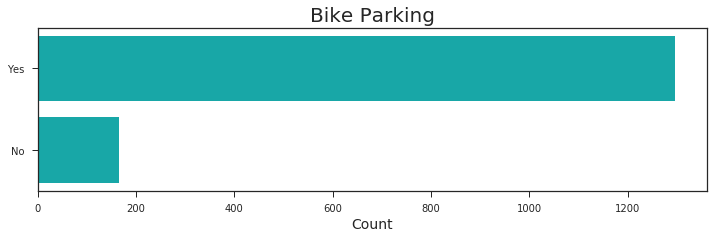

In [256]:
f, ax = plt.subplots(figsize=(12, 3))
sns.countplot(y="Bike Parking", data=bar_data2, color="c");
ax.set_title("Bike Parking",fontsize=20);
ax.set_xlabel("Count",fontsize=14)
ax.set_ylabel("");

In [257]:
bar_bikes = pd.get_dummies(bar_data2['Bike Parking'],prefix="Bike Parking")
bar_bikes['City'] = bar_data2['City']
del bar_bikes['Bike Parking_No']

Some of the larger, and more tourist-centric cities like Las Vegas and New York have the fewest bars with bike parking available. Austin and Louisville lead the dataset in bike parking.

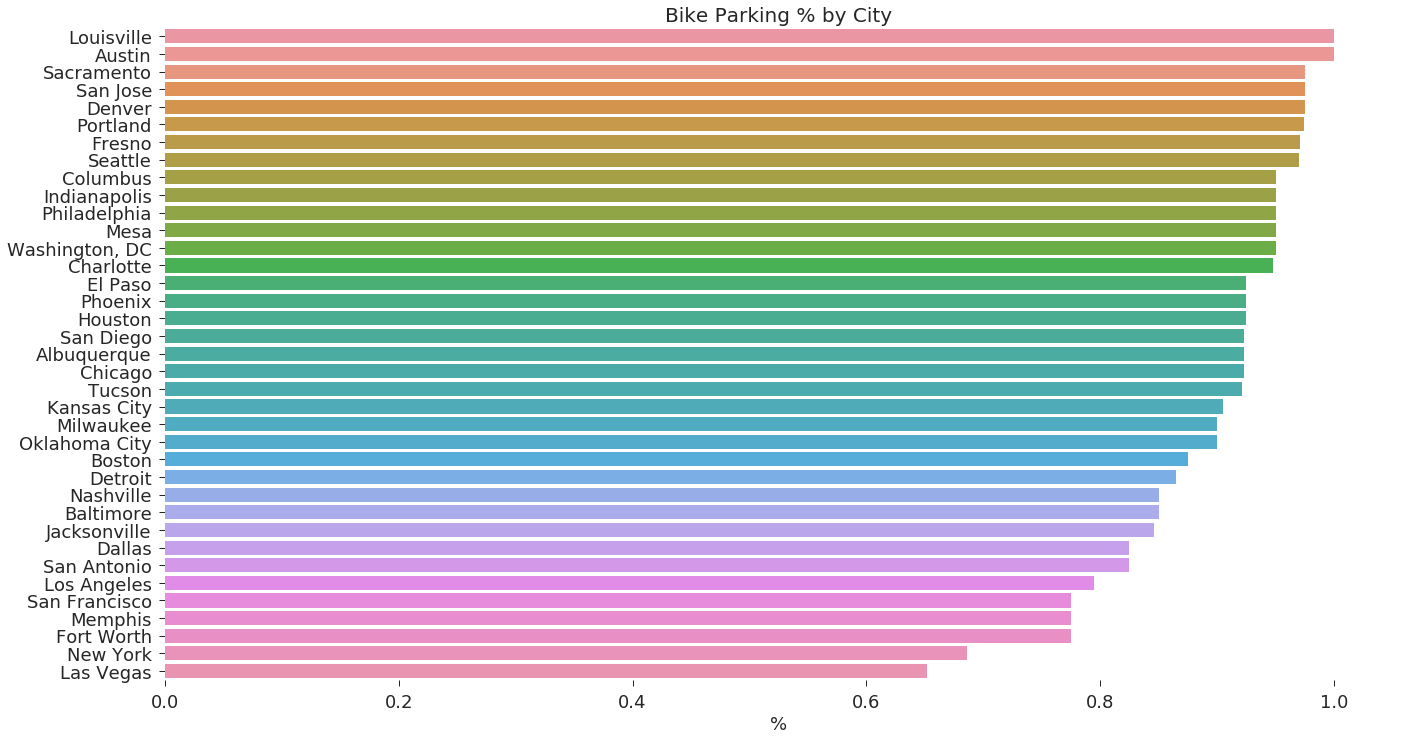

In [258]:
bar_bikes_grp = pd.DataFrame(bar_data2
                   .groupby("City")
                   .apply(lambda x: x[x['Bike Parking'] == 'Yes']
                   .count()/x.count())['Bike Parking']
                   .reset_index()
                   .sort_values('Bike Parking',ascending=False))
fig, ax1 = plt.subplots(figsize=(22, 12))
ax1.set_ylabel("%",fontsize=18)
ax1.set_xlabel("City",fontsize=18)
ax1.xaxis.set_tick_params(labelsize=14)
ax1.yaxis.set_tick_params(labelsize=14)
sns.barplot(y='City', x='Bike Parking', data=bar_bikes_grp, ax=ax1,linewidth=2.5);
sns.despine(left=True, bottom=True)

ax1.set_title("Bike Parking % by City",fontsize=20);
ax1.set_xlabel("%",fontsize=18);
ax1.set_ylabel("");
ax1.yaxis.set_tick_params(labelsize=18);
ax1.xaxis.set_tick_params(labelsize=18);

## Good for Dancing

Apparently not all bars are good for dancing and the standard for the criterion seems somewhat high as an overwhelming number of bars in our dataset are NOT claimed to be 'Good for Dancing'.

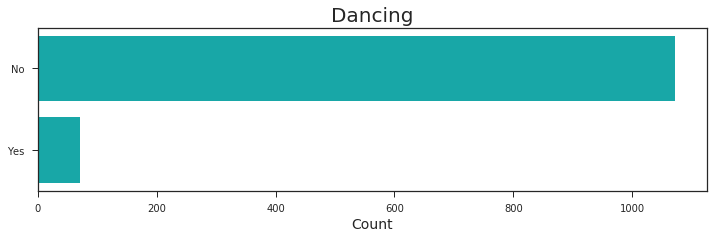

In [259]:
f, ax = plt.subplots(figsize=(12, 3))
sns.countplot(y="Good For Dancing", data=bar_data2, color="c");
ax.set_title("Dancing",fontsize=20);
ax.set_xlabel("Count",fontsize=14)
ax.set_ylabel("");

In [260]:
bar_dancing = pd.get_dummies(bar_data2['Good For Dancing'],prefix="Good For Dancing")
bar_dancing['City'] = bar_data2['City']
del bar_dancing['Good For Dancing_No']

The cities with the highest proportions of bars that are 'Good for Dancing' include Western cities like Las Vegas and Los Angeles, as well as music-centric cities like Memphis and Nashville.  Interestingly, none of the top 40 bars in cultural hotspots like New York, Seattle or Washington D.C. were claimed as 'Good for Dancing'.

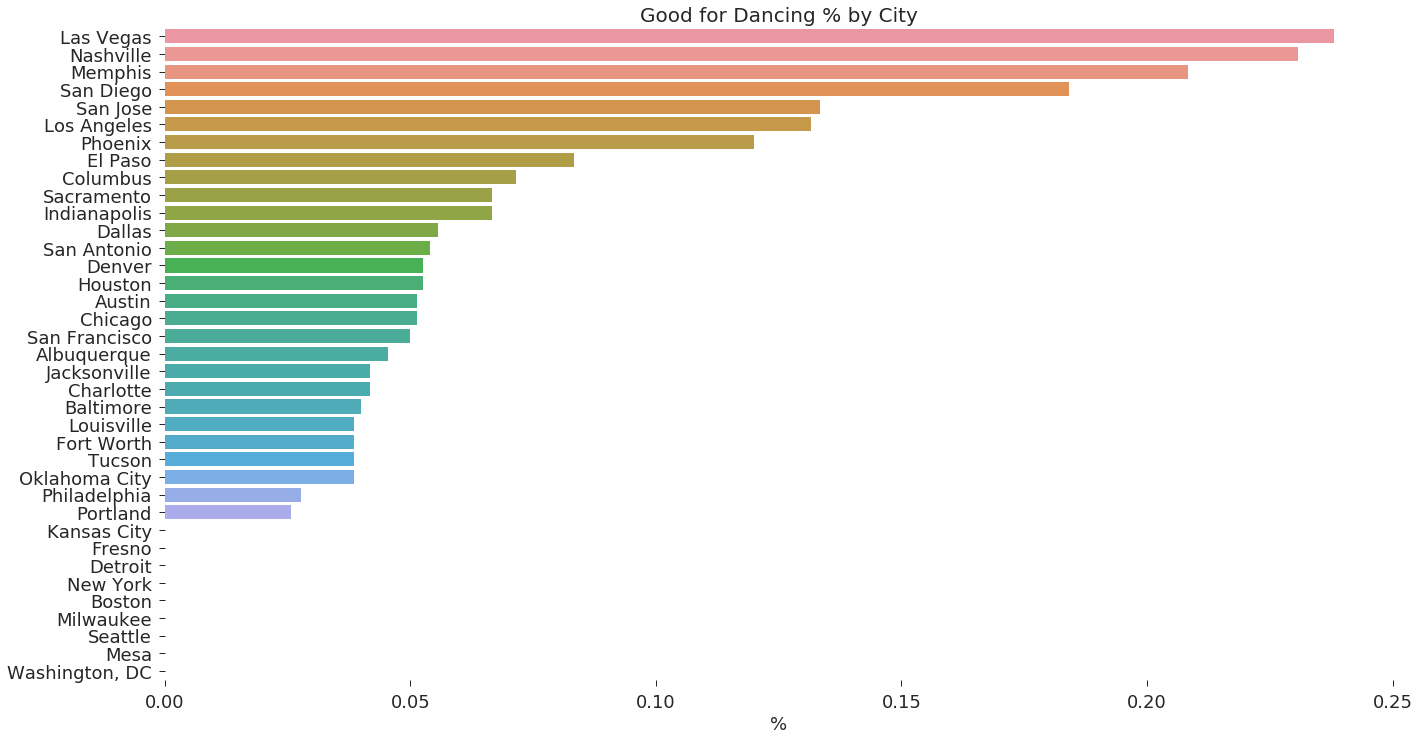

In [261]:
bar_dancing_grp = pd.DataFrame(bar_data2
                   .groupby("City")
                   .apply(lambda x: x[x['Good For Dancing'] == 'Yes']
                   .count()/x.count())['Good For Dancing']
                   .reset_index()
                   .sort_values('Good For Dancing',ascending=False))
fig, ax1 = plt.subplots(figsize=(22, 12))
sns.barplot(y='City', x='Good For Dancing', data=bar_dancing_grp, ax=ax1,linewidth=2.5);
sns.despine(left=True, bottom=True)

ax1.set_title("Good for Dancing % by City",fontsize=20);
ax1.set_xlabel("%",fontsize=18);
ax1.set_ylabel("");
ax1.yaxis.set_tick_params(labelsize=18);
ax1.xaxis.set_tick_params(labelsize=18);

## Good for Groups

The fact that the bars in this sample represent the most-rated bars in their respective cities, lends credence to the idea that perhaps most of them are 'Good for Groups'.  This is apparent in the sample as shown below:

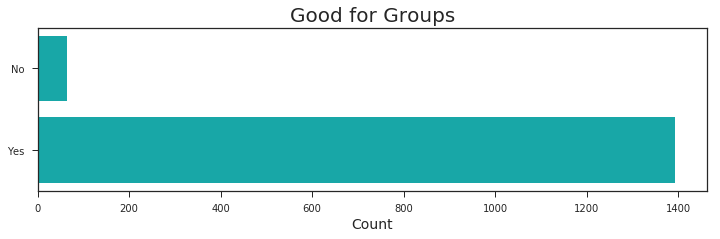

In [262]:
f, ax = plt.subplots(figsize=(12, 3))
sns.countplot(y="Good for Groups", data=bar_data2, color="c");

ax.set_title("Good for Groups",fontsize=20);
ax.set_xlabel("Count",fontsize=14)
ax.set_ylabel("");

In [263]:
bar_groups = pd.get_dummies(bar_data2['Good for Groups'],prefix="Good for Groups")
bar_groups['City'] = bar_data2['City']
del bar_groups['Good for Groups_No']

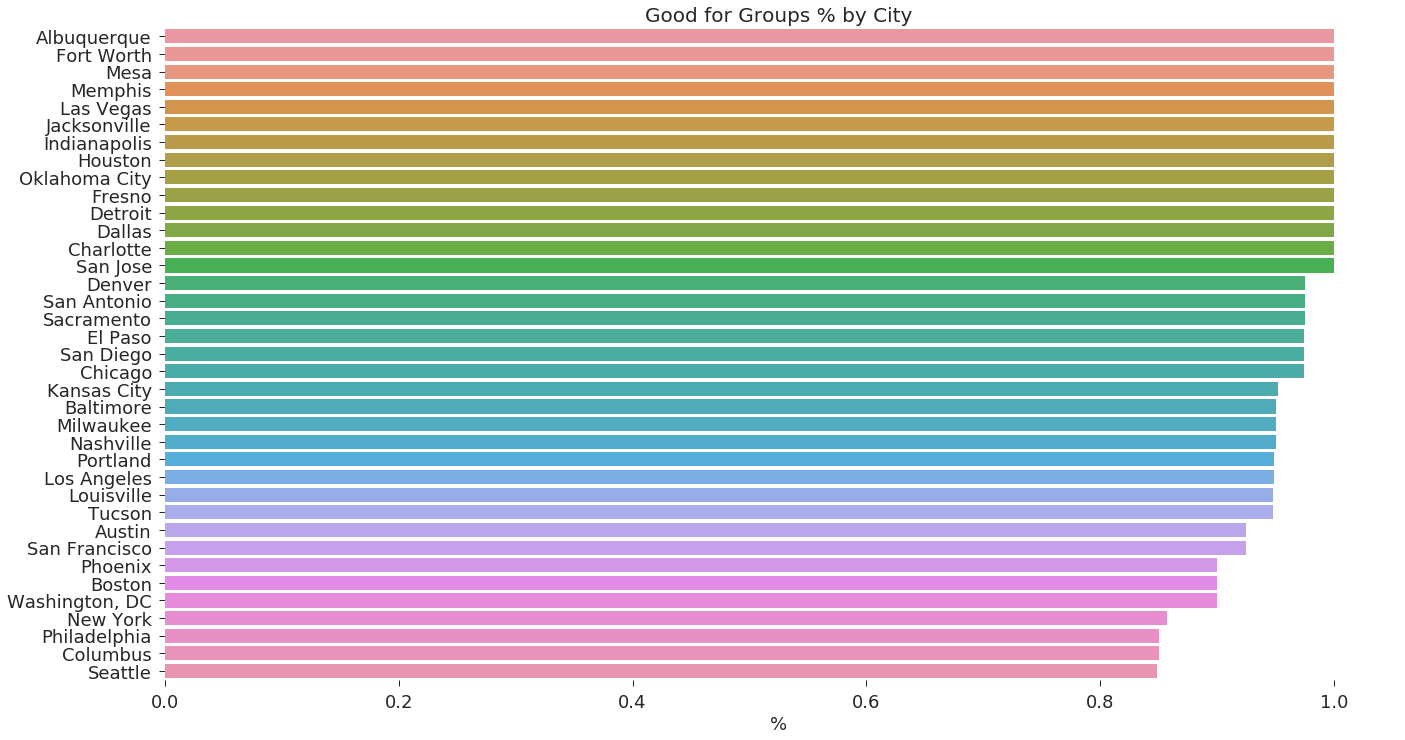

In [264]:
bar_groups_grp = pd.DataFrame(bar_data2
                   .groupby("City")
                   .apply(lambda x: x[x['Good for Groups'] == 'Yes']
                   .count()/x.count())['Good for Groups']
                   .reset_index()
                   .sort_values('Good for Groups',ascending=False))
fig, ax1 = plt.subplots(figsize=(22, 12))
sns.barplot(y='City', x='Good for Groups', data=bar_groups_grp, ax=ax1,linewidth=2.5);
sns.despine(left=True, bottom=True)

ax1.set_title("Good for Groups % by City",fontsize=20);
ax1.set_xlabel("%",fontsize=18);
ax1.set_ylabel("");
ax1.yaxis.set_tick_params(labelsize=18);
ax1.xaxis.set_tick_params(labelsize=18);

## Happy Hour

Happy Hour is a very popular activity during weekdays.  However, this is more prevalent in mid-size cities than in larger cities as shown by the lack of Happy Hour in cities like New York and Chicago.

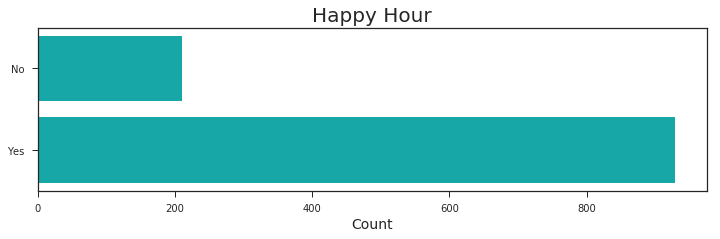

In [265]:
f, ax = plt.subplots(figsize=(12, 3))
sns.countplot(y="Happy Hour", data=bar_data2, color="c");

ax.set_title("Happy Hour",fontsize=20);
ax.set_xlabel("Count",fontsize=14)
ax.set_ylabel("");

In [266]:
bar_hh = pd.get_dummies(bar_data2['Happy Hour'],prefix="Happy Hour")
bar_hh['City'] = bar_data2['City']
del bar_hh['Happy Hour_No']

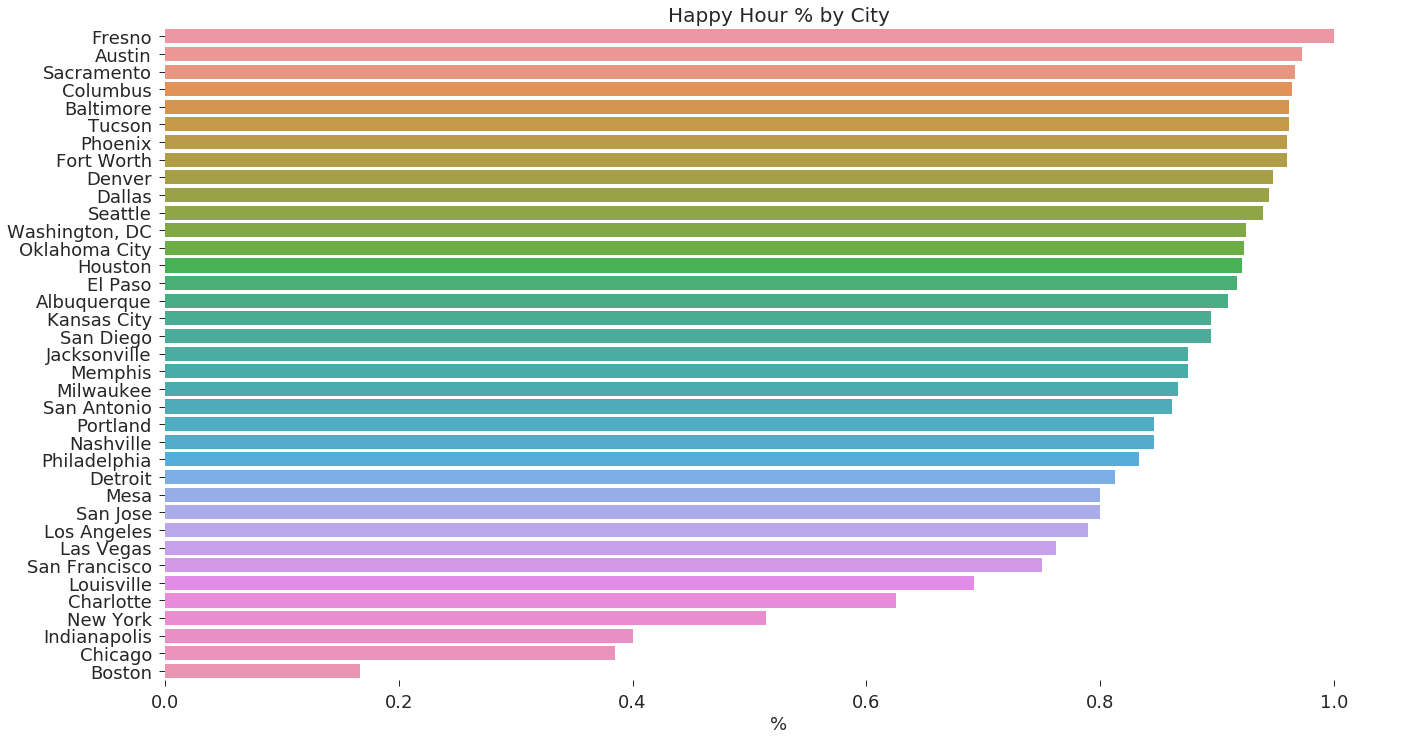

In [267]:
bar_hh_grp = pd.DataFrame(bar_data2
                   .groupby("City")
                   .apply(lambda x: x[x['Happy Hour'] == 'Yes']
                   .count()/x.count())['Happy Hour']
                   .reset_index()
                   .sort_values('Happy Hour',ascending=False))
fig, ax1 = plt.subplots(figsize=(22, 12))
sns.barplot(y='City', x='Happy Hour', data=bar_hh_grp, ax=ax1,linewidth=2.5);
sns.despine(left=True, bottom=True)
# ax1.set(xlabel='%', ylabel='City');

ax1.set_title("Happy Hour % by City",fontsize=20);
ax1.set_xlabel("%",fontsize=18);
ax1.set_ylabel("");
ax1.yaxis.set_tick_params(labelsize=18);
ax1.xaxis.set_tick_params(labelsize=18);

## Pool Tables

Pool tables are emphatic of the types of certain, distinct types of establishments.  As such, we would expect them to exist in a smallish segment of the market.  Clearly, Memphis and Mesa are cities which embody these types of establishments as they lead all other cities in pool tables by a far margin.

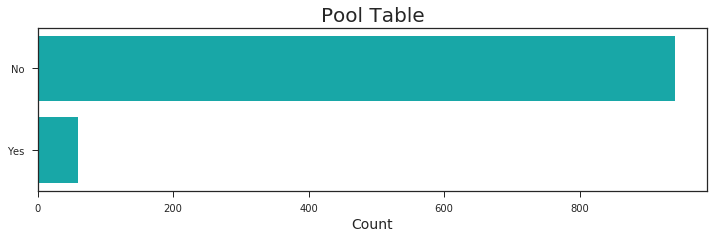

In [268]:
f, ax = plt.subplots(figsize=(12, 3))
sns.countplot(y="Has Pool Table", data=bar_data2, color="c");

ax.set_title("Pool Table",fontsize=20);
ax.set_xlabel("Count",fontsize=14)
ax.set_ylabel("");

In [269]:
bar_pooltable = pd.get_dummies(bar_data2['Has Pool Table'],prefix="Pool Table")
bar_pooltable['City'] = bar_data2['City']
del bar_pooltable['Pool Table_No']

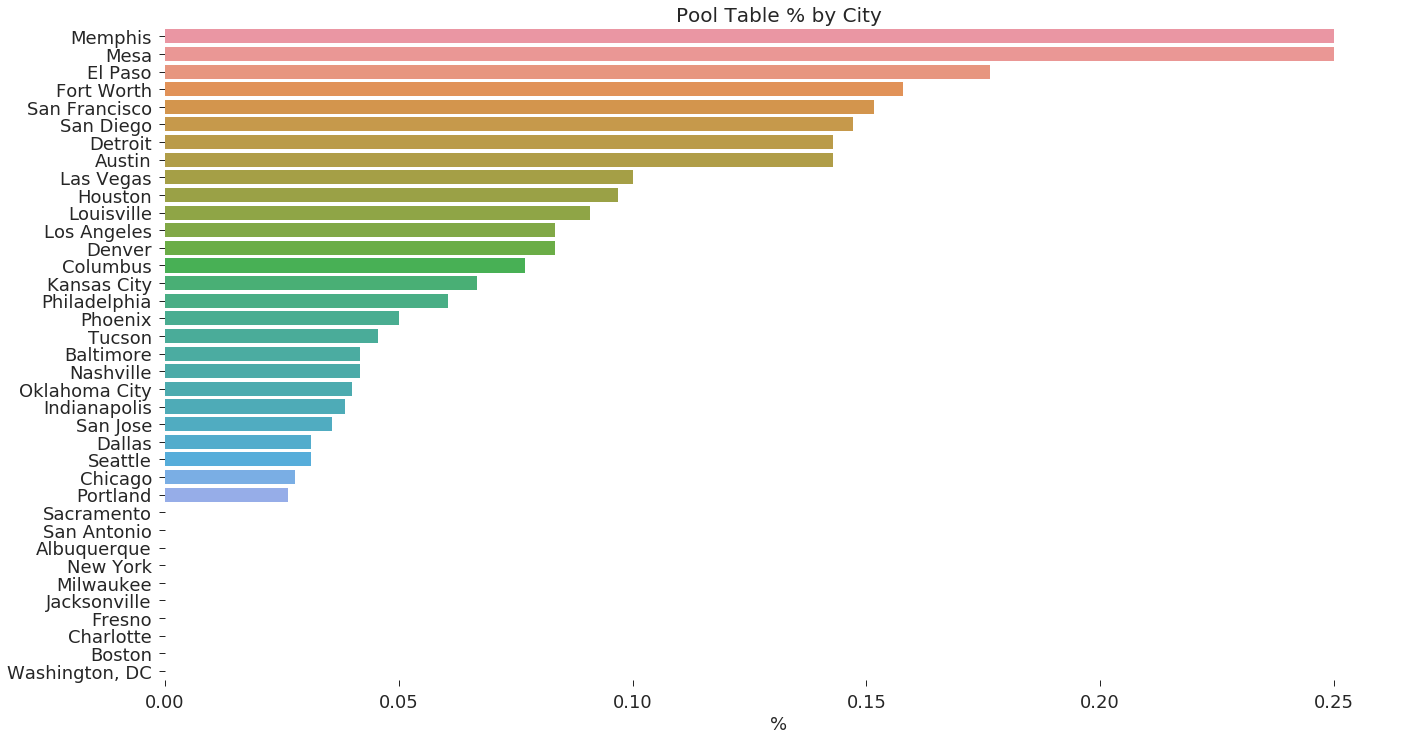

In [270]:
bar_pooltable_grp = pd.DataFrame(bar_data2
                   .groupby("City")
                   .apply(lambda x: x[x['Has Pool Table'] == 'Yes']
                   .count()/x.count())['Has Pool Table']
                   .reset_index()
                   .sort_values('Has Pool Table',ascending=False))
fig, ax1 = plt.subplots(figsize=(22, 12))
sns.barplot(y='City', x='Has Pool Table', data=bar_pooltable_grp, ax=ax1,linewidth=2.5);
sns.despine(left=True, bottom=True)

ax1.set_title("Pool Table % by City",fontsize=20);
ax1.set_xlabel("%",fontsize=18);
ax1.set_ylabel("");
ax1.yaxis.set_tick_params(labelsize=18);
ax1.xaxis.set_tick_params(labelsize=18);

## Outdoor Seating

Bars with outdoor seating are twice as common as those with no outdoor seating.  We can seethat the bars with the fewest bars with outdoor seating are concentrated around the more densly populated and colder areas of the Northeast and Northwest.

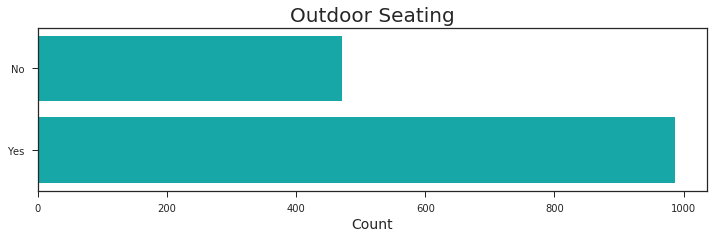

In [271]:
f, ax = plt.subplots(figsize=(12, 3))
sns.countplot(y="Outdoor Seating", data=bar_data2, color="c");

ax.set_title("Outdoor Seating",fontsize=20);
ax.set_xlabel("Count",fontsize=14)
ax.set_ylabel("");

In [272]:
bar_outdoor = pd.get_dummies(bar_data2['Outdoor Seating'],prefix="Outdoor Seating")
bar_outdoor['City'] = bar_data2['City']
del bar_outdoor['Outdoor Seating_No']

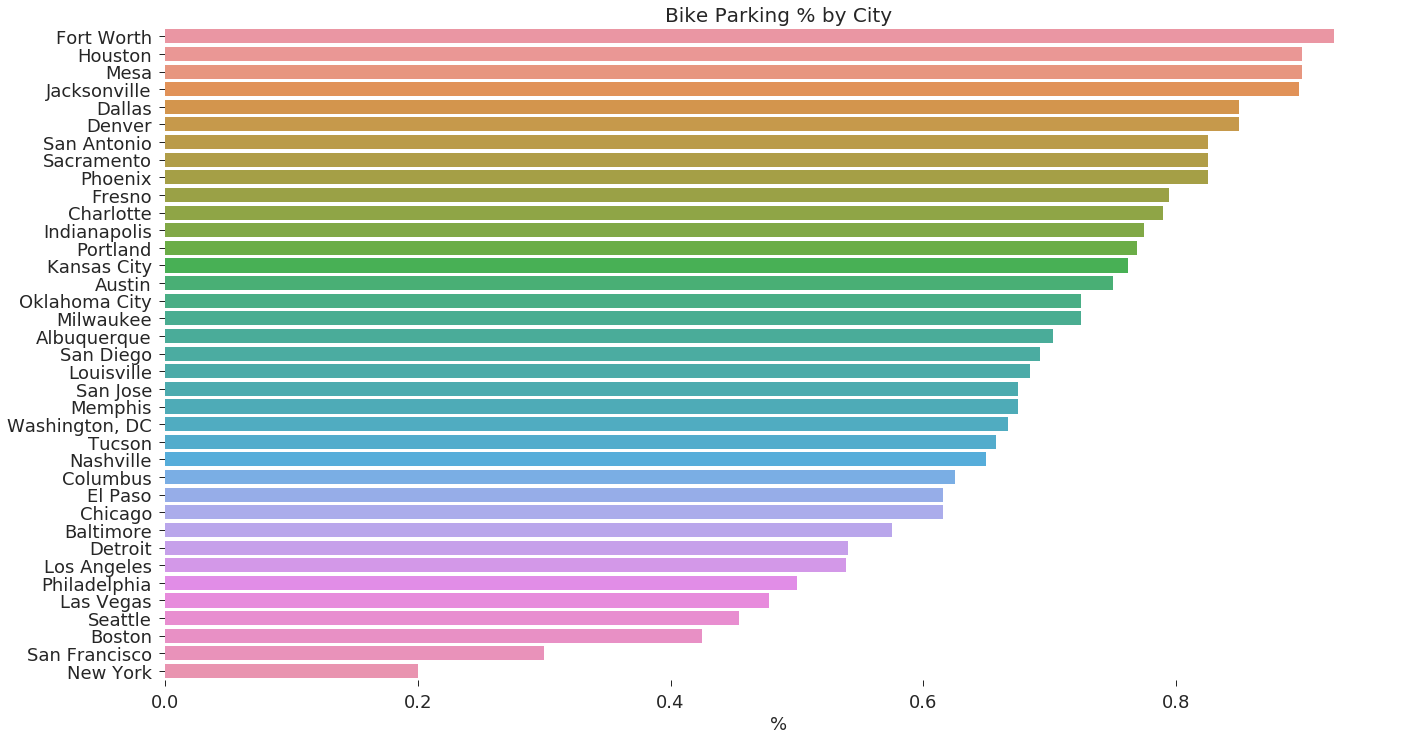

In [273]:
bar_outdoor_grp = pd.DataFrame(bar_data2
                   .groupby("City")
                   .apply(lambda x: x[x['Outdoor Seating'] == 'Yes']
                   .count()/x.count())['Outdoor Seating']
                   .reset_index()
                   .sort_values('Outdoor Seating',ascending=False))
fig, ax1 = plt.subplots(figsize=(22, 12))
sns.barplot(y='City', x='Outdoor Seating', data=bar_outdoor_grp, ax=ax1,linewidth=2.5);
sns.despine(left=True, bottom=True)

ax1.set_title("Bike Parking % by City",fontsize=20);
ax1.set_xlabel("%",fontsize=18);
ax1.set_ylabel("");
ax1.yaxis.set_tick_params(labelsize=18);
ax1.xaxis.set_tick_params(labelsize=18);

## Reservations

Making reservations at bars might not be of interest unless an one is planning a special event or the bar itself is higher end.  However, more bars in our dataset take reservations than do not.

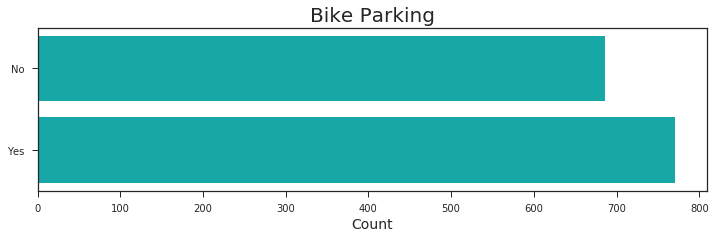

In [274]:
f, ax = plt.subplots(figsize=(12, 3))
sns.countplot(y="Takes Reservations", data=bar_data2, color="c");

ax.set_title("Bike Parking",fontsize=20);
ax.set_xlabel("Count",fontsize=14)
ax.set_ylabel("");

In [275]:
bar_reservations = pd.get_dummies(bar_data2['Takes Reservations'],prefix="Takes_Reservations")
bar_reservations['City'] = bar_data2['City']

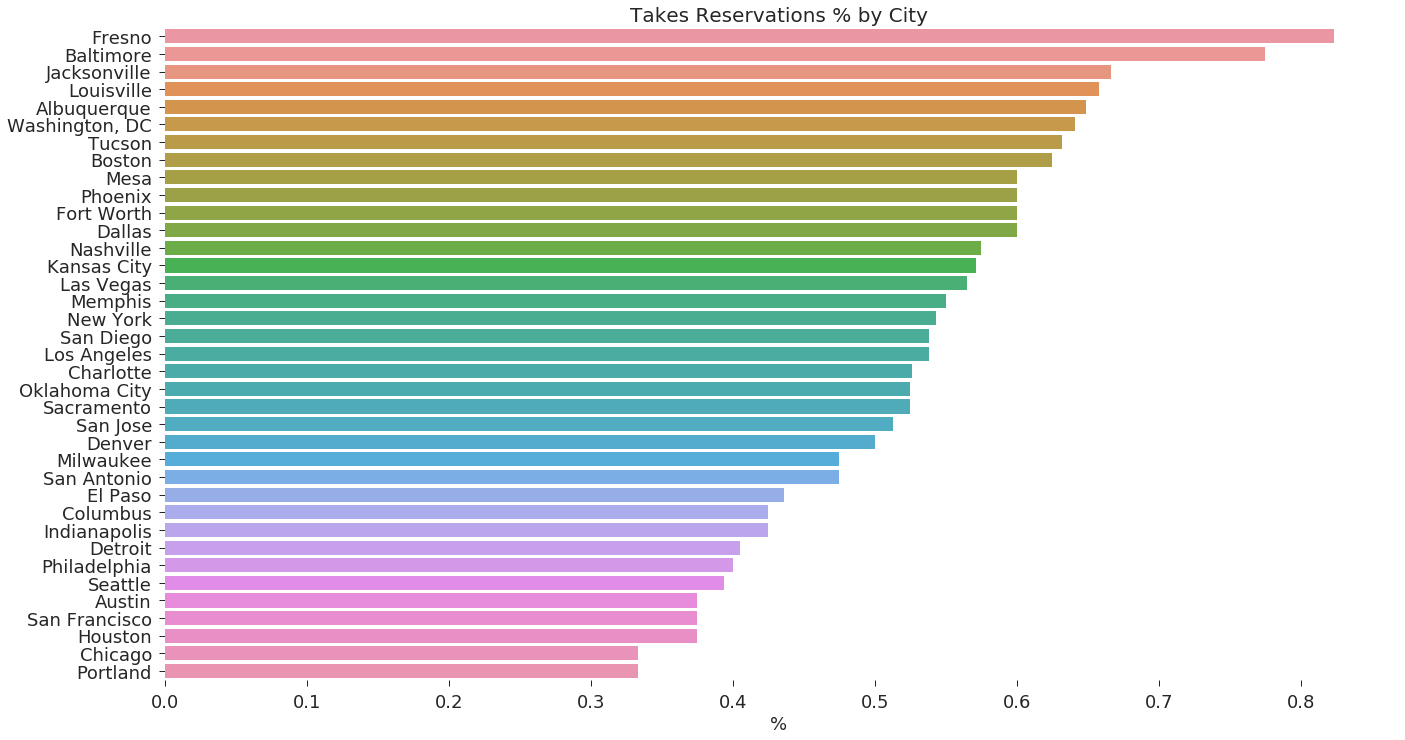

In [276]:
bar_reservations_grp = pd.DataFrame(bar_data2
                       .groupby("City")
                       .apply(lambda x: x[x['Takes Reservations'] == 'Yes']
                       .count()/x.count())['Takes Reservations']
                       .reset_index()
                       .sort_values('Takes Reservations',ascending=False))
fig, ax1 = plt.subplots(figsize=(22, 12))
sns.barplot(y='City', x='Takes Reservations', data=bar_reservations_grp, ax=ax1,linewidth=2.5);
sns.despine(left=True, bottom=True)
ax1.set(xlabel='%', ylabel='City');

ax1.set_title("Takes Reservations % by City",fontsize=20);
ax1.set_xlabel("%",fontsize=18);
ax1.set_ylabel("");
ax1.yaxis.set_tick_params(labelsize=18);
ax1.xaxis.set_tick_params(labelsize=18);

## Waiter Service

The vast majority of the bars in our dataset offer waiter service.

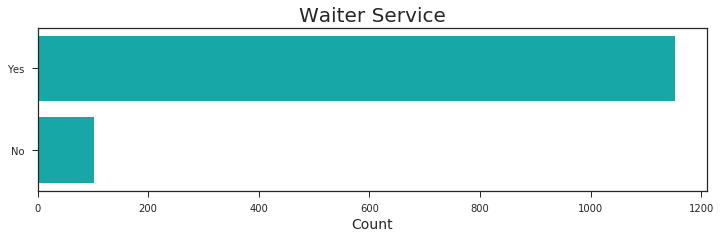

In [277]:
f, ax = plt.subplots(figsize=(12, 3))
sns.countplot(y="Waiter_Service", data=bar_data2, color="c");

ax.set_title("Waiter Service",fontsize=20);
ax.set_xlabel("Count",fontsize=14)
ax.set_ylabel("");

In [278]:
bar_waiters = bar_data2[['City','Waiter_Service']]
bar_waiters_grp = pd.DataFrame(bar_data2
                               .groupby("City")
                               .apply(lambda x: x[x['Waiter_Service'] == 'Yes']
                               .count()/x.count())['Waiter_Service']
                               .reset_index()
                               .sort_values('Waiter_Service',ascending=False))

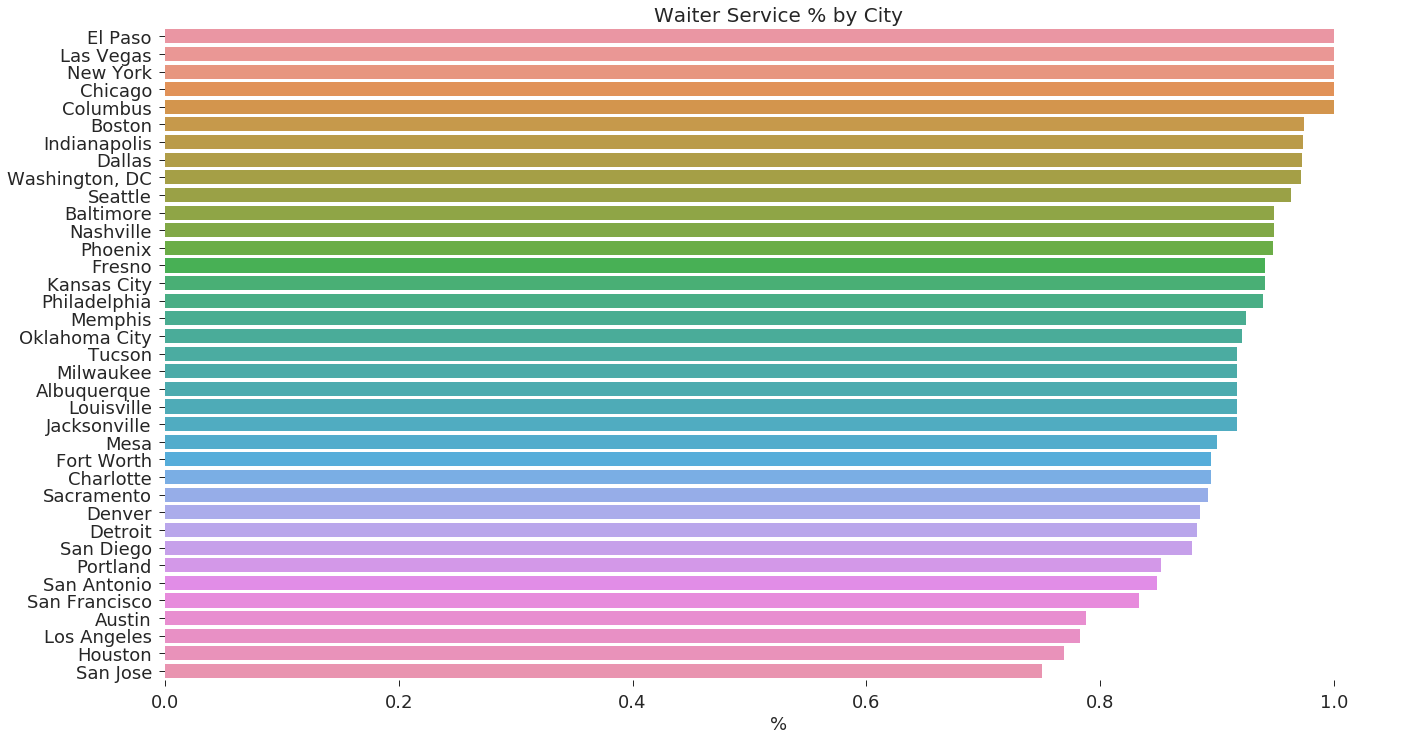

In [279]:
fig, ax1 = plt.subplots(figsize=(22, 12))
sns.barplot(y='City', x='Waiter_Service', data=bar_waiters_grp, ax=ax1,linewidth=2.5);
sns.despine(left=True, bottom=True)

ax1.set_title("Waiter Service % by City",fontsize=20);
ax1.set_xlabel("%",fontsize=18);
ax1.set_ylabel("");
ax1.yaxis.set_tick_params(labelsize=18);
ax1.xaxis.set_tick_params(labelsize=18);

## Best Nights

When it comes to the best nights to go our, Friday and Saturday night are the clear favorites. However, Thursday and Sunday have significant proportions as well. A high proportion of bars proclaiming Thursday night as the best night exist in Los Angeles, San Francisco and New York.  Likewise a relatively high proportion of Sunday night bars exist in Western cities like Austin, Dallas, Las Vegas and Kansas City.

In [280]:
bar_data2['Mon_Night'] = np.where(bar_data2['Best Nights'].str.contains("Mon", na=False),1,0)
bar_data2['Tue_Night'] = np.where(bar_data2['Best Nights'].str.contains("Tue", na=False),1,0)
bar_data2['Wed_Night'] = np.where(bar_data2['Best Nights'].str.contains("Wed", na=False),1,0)
bar_data2['Thu_Night'] = np.where(bar_data2['Best Nights'].str.contains("Thu", na=False),1,0)
bar_data2['Fri_Night'] = np.where(bar_data2['Best Nights'].str.contains("Fri", na=False),1,0)
bar_data2['Sat_Night'] = np.where(bar_data2['Best Nights'].str.contains("Sat", na=False),1,0)
bar_data2['Sun_Night'] = np.where(bar_data2['Best Nights'].str.contains("Sun", na=False),1,0)
bar_data_nights = bar_data2[['City','Mon_Night','Tue_Night','Wed_Night',
                            'Thu_Night','Fri_Night','Sat_Night','Sun_Night']]

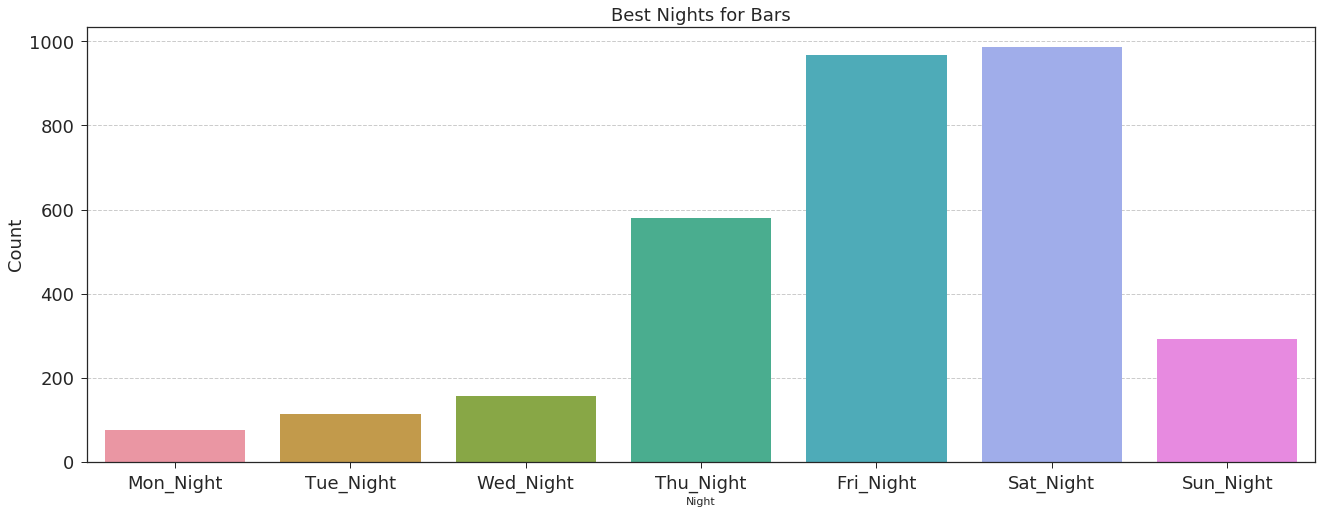

In [281]:
tidy = (
    bar_data_nights.set_index('City')
      .stack()  # un-pivots the data 
      .reset_index()  # moves all data out of the index
      .rename(columns={'level_1': 'Night', 0: 'Count'})
      .groupby('Night').agg({'Count':'sum'})
      .reset_index()
)
current_palette_7 = sns.color_palette("Set1", 2)
sns.set_palette(current_palette_7)
sns.set(style="ticks")

fig, ax1 = plt.subplots(figsize=(22, 8))
sns.barplot(x='Night', y='Count', data=tidy, ax=ax1,linewidth=2.5,
            order=["Mon_Night","Tue_Night","Wed_Night","Thu_Night",
                   "Fri_Night","Sat_Night","Sun_Night"]);
ax1.set(xlabel='Night', ylabel='Count');
ax1.set_title("Best Nights for Bars",size=18);
ax1.grid(linestyle='--', linewidth=1,axis="y")
ax1.set_ylabel("Count",fontsize=18);
ax1.yaxis.set_tick_params(labelsize=18);
ax1.xaxis.set_tick_params(labelsize=18);

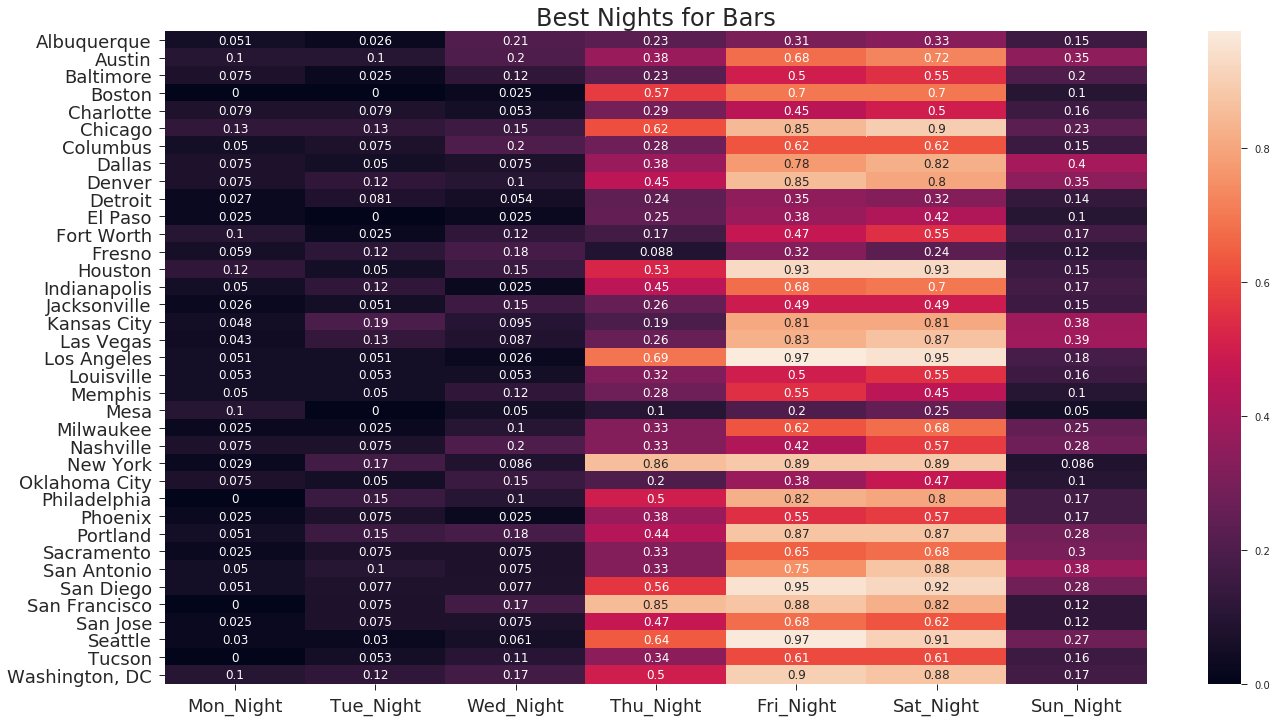

In [282]:
bar_data_nights_grp = pd.melt(bar_data_nights, id_vars=['City']).groupby(["City","variable"]).apply(lambda x: x[x['value'] != \
                        0].count()/x.count())['value'].reset_index()
bar_data_nights_grp = bar_data_nights_grp.pivot_table(values='value', 
                                              index='City', columns='variable', aggfunc='sum')
columns = ['Mon_Night','Tue_Night','Wed_Night','Thu_Night','Fri_Night','Sat_Night','Sun_Night']
bar_data_nights_grp = bar_data_nights_grp[columns]
fig, ax = plt.subplots(figsize=(22,12)) 
ax = sns.heatmap(bar_data_nights_grp,annot=True);
ax.set_title('Best Nights for Bars', fontsize=24);
plt.xlabel('', fontsize=18);
plt.ylabel('', fontsize=18);
ax.yaxis.set_tick_params(labelsize=18);
ax.xaxis.set_tick_params(labelsize=18);

In [283]:
bar_data_nights_grp2 = pd.DataFrame(bar_data_nights_grp.values,
                         columns=['Mon_Night','Tue_Night','Wed_Night','Thu_Night','Fri_Night','Sat_Night','Sun_Night'])
bar_data_nights_grp2.index = bar_data_nights_grp.index
bar_data_nights_grp2.reset_index(inplace=True)

## Ambiance

Ambience is a distinctive attribute that Yelp reviewers can assign to bars and establishments.  Not suprisingly, a neutral, or casual ambience is the most frequent type of ambience assigned to bars in our sample.  This are followed by 'Trendy' and 'Hipster' ambience types.

In [284]:
bar_data2['Amb_Casual'] = np.where(bar_data2['Ambience'].str.contains("Casual", na=False),1,0)
bar_data2['Amb_Classy'] = np.where(bar_data2['Ambience'].str.contains("Classy", na=False),1,0)
bar_data2['Amb_Romantic'] = np.where(bar_data2['Ambience'].str.contains("Romantic", na=False),1,0)
bar_data2['Amb_Trendy'] = np.where(bar_data2['Ambience'].str.contains("Trendy", na=False),1,0)
bar_data2['Amb_Divey'] = np.where(bar_data2['Ambience'].str.contains("Divey", na=False),1,0)
bar_data2['Amb_Hipster'] = np.where(bar_data2['Ambience'].str.contains("Hipster", na=False),1,0)
bar_data2['Amb_Upscale'] = np.where(bar_data2['Ambience'].str.contains("Upscale", na=False),1,0)
bar_data2['Amb_Intimate'] = np.where(bar_data2['Ambience'].str.contains("Intimate", na=False),1,0)

Geographically, some distinct characteristics of the given cities in our dataset can be inferred by the proportion of different ambience types of their bars.  For example, Detroit, Louisville, Philadelphia, Portland and Phoenix seem to have large concentrations of 'hipster' bars. Likewise, Nashville, Phoenix and Boston have higher proportions of 'trendy' bars.

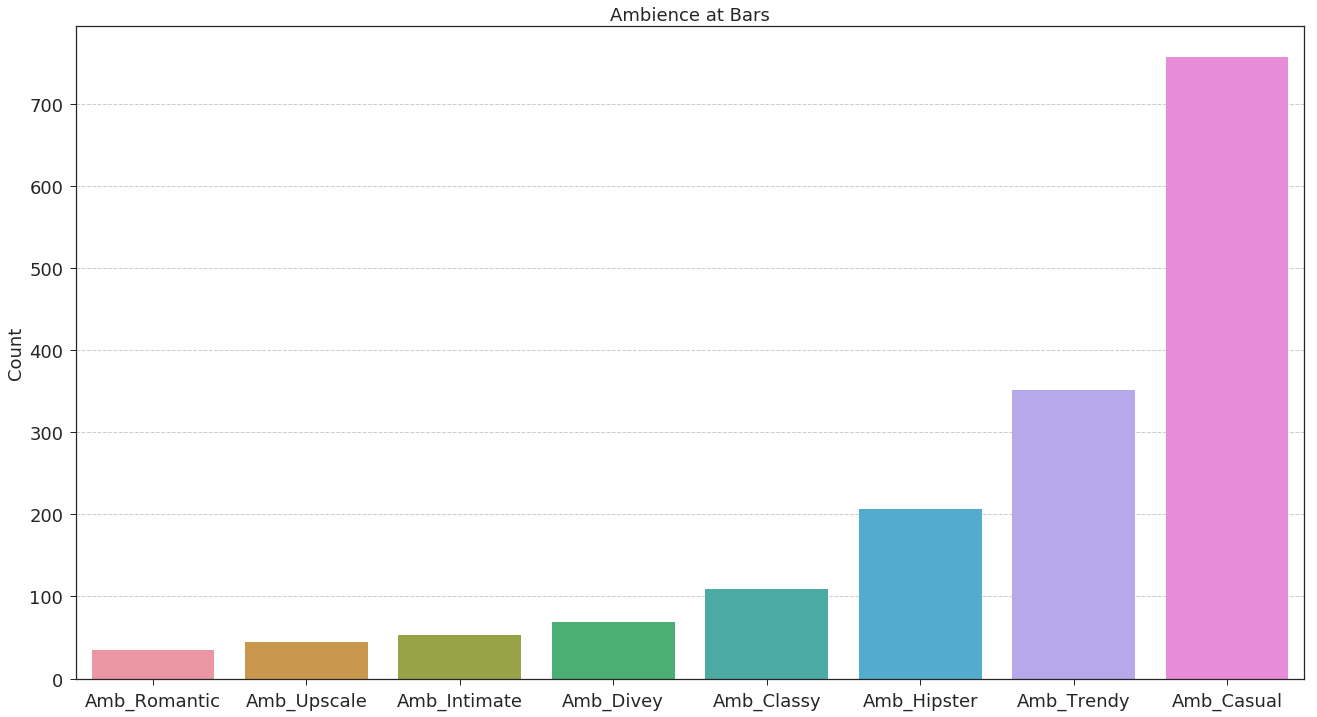

In [285]:
bar_data_ambience = bar_data2[['City','Amb_Casual','Amb_Classy','Amb_Romantic','Amb_Trendy',
                            'Amb_Divey','Amb_Hipster','Amb_Upscale','Amb_Intimate']]
bar_data_ambience_grp = pd.melt(bar_data_ambience, id_vars=['City']).groupby(["City","variable"]).apply(lambda x: x[x['value'] != \
                        0].count()/x.count())['value'].reset_index()
bar_data_ambience_grp = bar_data_ambience_grp.pivot_table(values='value', index='City', columns='variable', aggfunc='sum')
tidy = (
    bar_data_ambience.set_index('City')
      .stack()  # un-pivots the data 
      .reset_index()  # moves all data out of the index
      .rename(columns={'level_1': 'Ambience', 0: 'Count'})
      .groupby('Ambience').agg({'Count':'sum'})
      .reset_index()
      .sort_values("Count")
)
current_palette_7 = sns.color_palette("Set1", 2)
sns.set_palette(current_palette_7)
sns.set(style="ticks")

fig, ax1 = plt.subplots(figsize=(22, 12))
sns.barplot(x='Ambience', y='Count', data=tidy, ax=ax1,linewidth=2.5);

ax1.set_title("Ambience at Bars",size=18);
ax1.grid(linestyle='--', linewidth=1,axis="y")
ax1.set_ylabel("Count",fontsize=18);
ax1.set_xlabel("",fontsize=18);
ax1.yaxis.set_tick_params(labelsize=18);
ax1.xaxis.set_tick_params(labelsize=18);

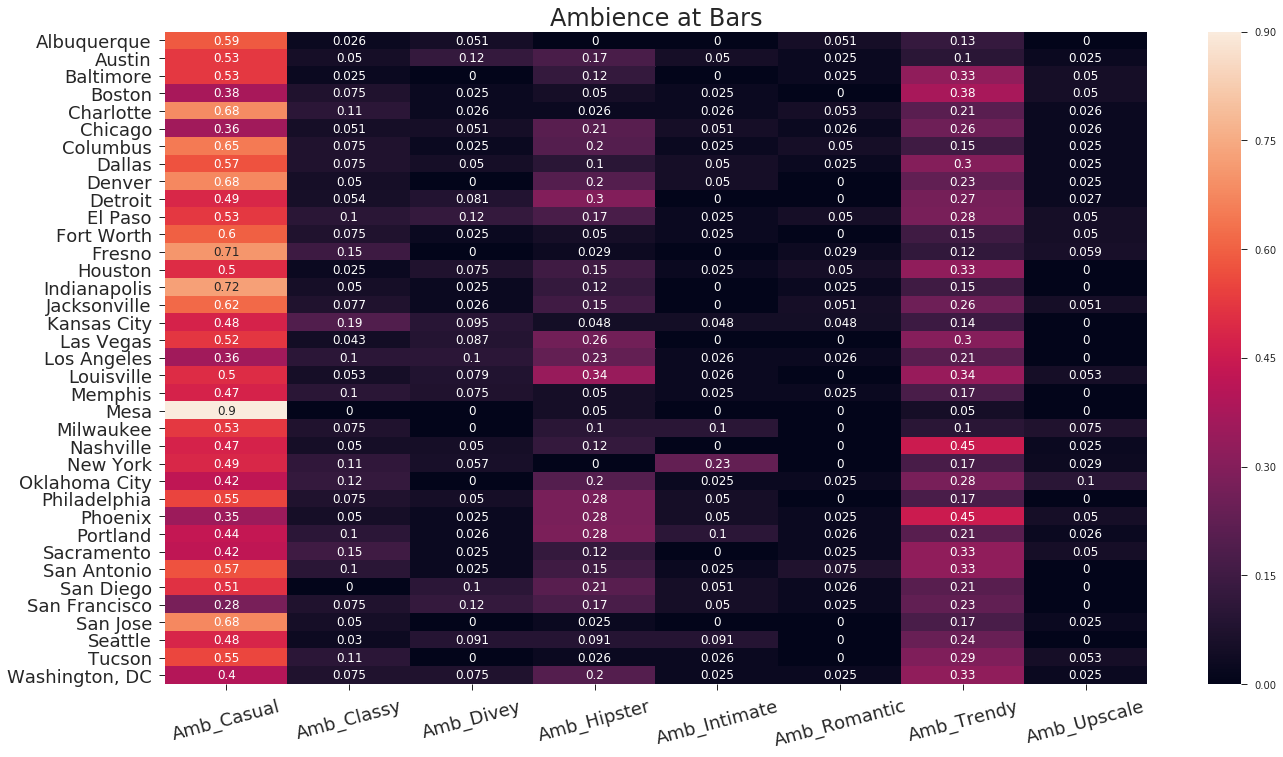

In [286]:
fig, ax = plt.subplots(figsize=(22,12)) 
ax = sns.heatmap(bar_data_ambience_grp,annot=True)
ax.set_title('Ambience at Bars', fontsize=24);
plt.xlabel('Ambience', fontsize=18);
plt.ylabel('City', fontsize=18);

ax.set_ylabel("",fontsize=18);
ax.set_xlabel("",fontsize=18);
ax.yaxis.set_tick_params(labelsize=18);
ax.xaxis.set_tick_params(labelsize=18);

for tick in ax.get_xticklabels():
    tick.set_rotation(15);

In [287]:
bar_data_ambience_grp2 = pd.DataFrame(bar_data_ambience_grp.values,
                         columns=['Amb_Casual','Amb_Classy','Amb_Romantic','Amb_Trendy',
                            'Amb_Divey','Amb_Hipster','Amb_Upscale','Amb_Intimate'])
bar_data_ambience_grp2.index = bar_data_ambience_grp.index
bar_data_ambience_grp2.reset_index(inplace=True)

## Parking Options

Most bars have street parking available, with a significant number have a private lot available as well.

In [288]:
bar_data2['Parking_Valet'] = np.where(bar_data2['Parking'].str.contains("Valet", na=False),1,0)
bar_data2['Parking_Street'] = np.where(bar_data2['Parking'].str.contains("Street", na=False),1,0)
bar_data2['Parking_Private Lot'] = np.where(bar_data2['Parking'].str.contains("Private Lot", na=False),1,0)
bar_data2['Parking_Validated'] = np.where(bar_data2['Parking'].str.contains("Validated", na=False),1,0)
bar_data2['Parking_Garage'] = np.where(bar_data2['Parking'].str.contains("Garage", na=False),1,0)

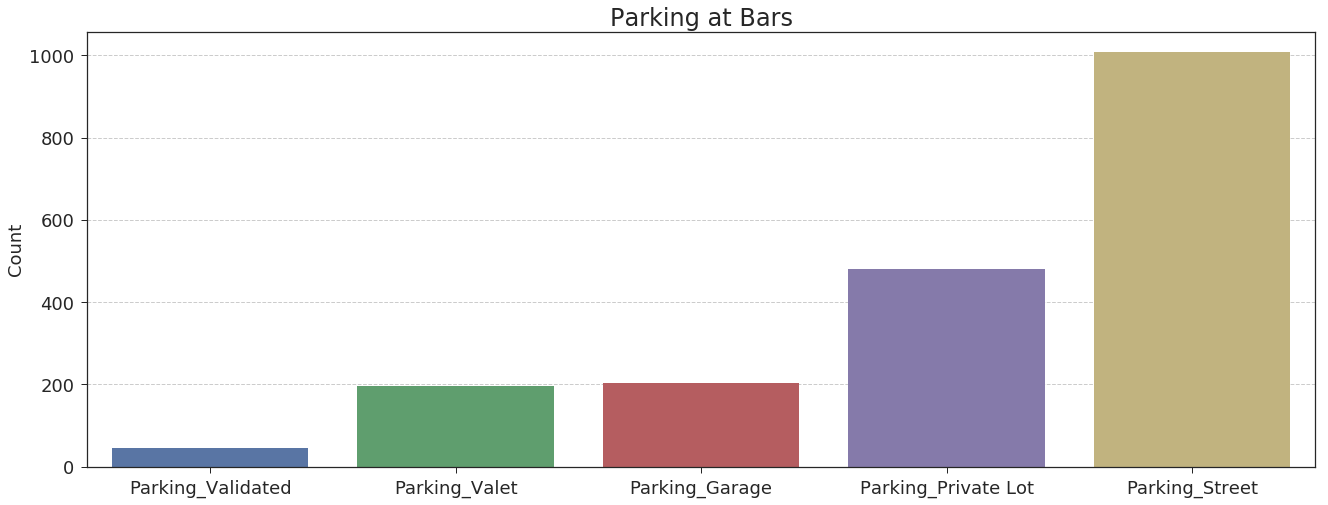

In [289]:
bar_data_parking = bar_data2[['City','Parking_Valet','Parking_Street','Parking_Private Lot','Parking_Validated',
                            'Parking_Garage']]
tidy = (
    bar_data_parking.set_index('City')
      .stack()  # un-pivots the data 
      .reset_index()  # moves all data out of the index
      .rename(columns={'level_1': 'Parking', 0: 'Count'})
      .groupby('Parking').agg({'Count':'sum'})
      .reset_index()
      .sort_values("Count")
)
current_palette_7 = sns.color_palette("Set1", 2)
sns.set_palette(current_palette_7)
sns.set(style="ticks")

fig, ax1 = plt.subplots(figsize=(22, 8))
sns.barplot(x='Parking', y='Count', data=tidy, ax=ax1,linewidth=2.5);

ax1.set_title("Parking at Bars",size=24);
ax1.grid(linestyle='--', linewidth=1,axis="y")
ax1.set_ylabel("Count",fontsize=18);
ax1.set_xlabel("",fontsize=18);
ax1.yaxis.set_tick_params(labelsize=18);
ax1.xaxis.set_tick_params(labelsize=18);

As one would expect, private parking lots are more rare in larger, more densely populated cities like Boston, Chicago, New York and Chicago.

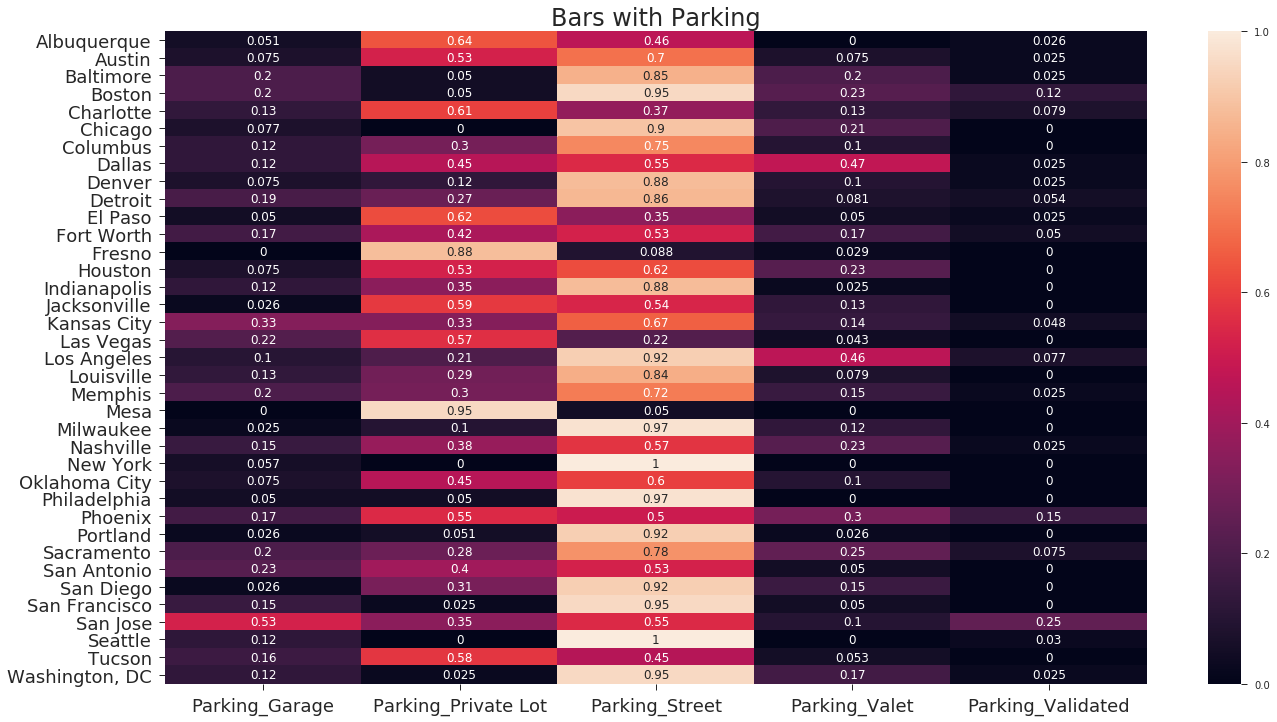

In [290]:
bar_data_parking_grp = pd.melt(bar_data_parking, id_vars=['City']).groupby(["City","variable"]).apply(lambda x: x[x['value'] != \
                        0].count()/x.count())['value'].reset_index()
bar_data_parking_grp = bar_data_parking_grp.pivot_table(values='value', index='City', columns='variable', aggfunc='sum')
fig, ax = plt.subplots(figsize=(22,12)) 
ax = sns.heatmap(bar_data_parking_grp,annot=True)
ax.set_title('Bars with Parking', fontsize=24);
plt.xlabel('', fontsize=18);
plt.ylabel('', fontsize=18);
ax.yaxis.set_tick_params(labelsize=18);
ax.xaxis.set_tick_params(labelsize=18);

In [291]:
bar_data_parking_grp2 = pd.DataFrame(bar_data_parking_grp.values,
                         columns=['Parking_Valet','Parking_Street','Parking_Private Lot','Parking_Validated',
                            'Parking_Garage'])
bar_data_parking_grp2.index = bar_data_parking_grp.index
bar_data_parking_grp2.reset_index(inplace=True)

## Music Types

As to be expected, bars with 'background' music are by far the most common in our dataset, however a significant number have live music, followed by smaller proportions of juke box and DJ-provided music.

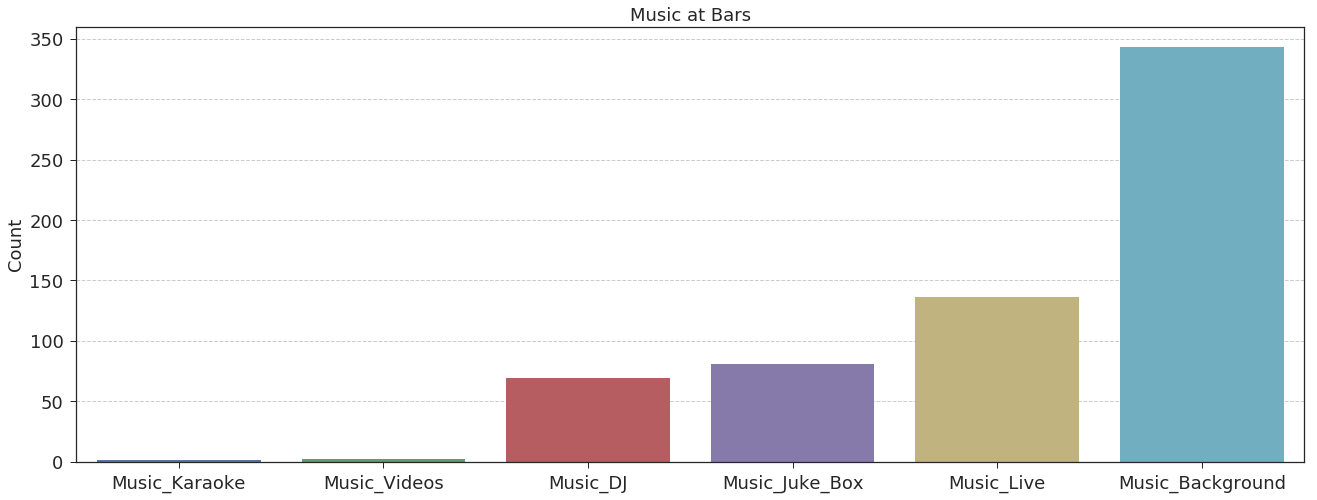

In [292]:
bar_data2['Music_Background'] = np.where(bar_data2['Music'].str.contains("Background", na=False),1,0)
bar_data2['Music_Live'] = np.where(bar_data2['Music'].str.contains("Live", na=False),1,0)
bar_data2['Music_Juke_Box'] = np.where(bar_data2['Music'].str.contains("Juke Box", na=False),1,0)
bar_data2['Music_DJ'] = np.where(bar_data2['Music'].str.contains("DJ", na=False),1,0)
bar_data2['Music_Videos'] = np.where(bar_data2['Music'].str.contains("Music Videos", na=False),1,0)
bar_data2['Music_Karaoke'] = np.where(bar_data2['Music'].str.contains("Karaoke", na=False),1,0)
bar_data_music = bar_data2[['City','Music_Background','Music_Live','Music_Juke_Box',
                            'Music_DJ','Music_Videos','Music_Karaoke']]
tidy = (
    bar_data_music.set_index('City')
      .stack()  # un-pivots the data 
      .reset_index()  # moves all data out of the index
      .rename(columns={'level_1': 'Music', 0: 'Count'})
      .groupby('Music').agg({'Count':'sum'})
      .reset_index()
      .sort_values("Count")
)
current_palette_7 = sns.color_palette("Set1", 2)
sns.set_palette(current_palette_7)
sns.set(style="ticks")

fig, ax1 = plt.subplots(figsize=(22, 8))
sns.barplot(x='Music', y='Count', data=tidy, ax=ax1,linewidth=2.5);

ax1.set_title("Music at Bars",size=18);
ax1.grid(linestyle='--', linewidth=1,axis="y")
ax1.set_ylabel("Count",fontsize=18);
ax1.set_xlabel("",fontsize=18);
ax1.yaxis.set_tick_params(labelsize=18);
ax1.xaxis.set_tick_params(labelsize=18);

As far as geographical preferences for music, we can see that Los Angeles, Las Vegas and San Diego love DJs while Austin, Kansas City and Nashville have relatively high proportions of bars with live music.

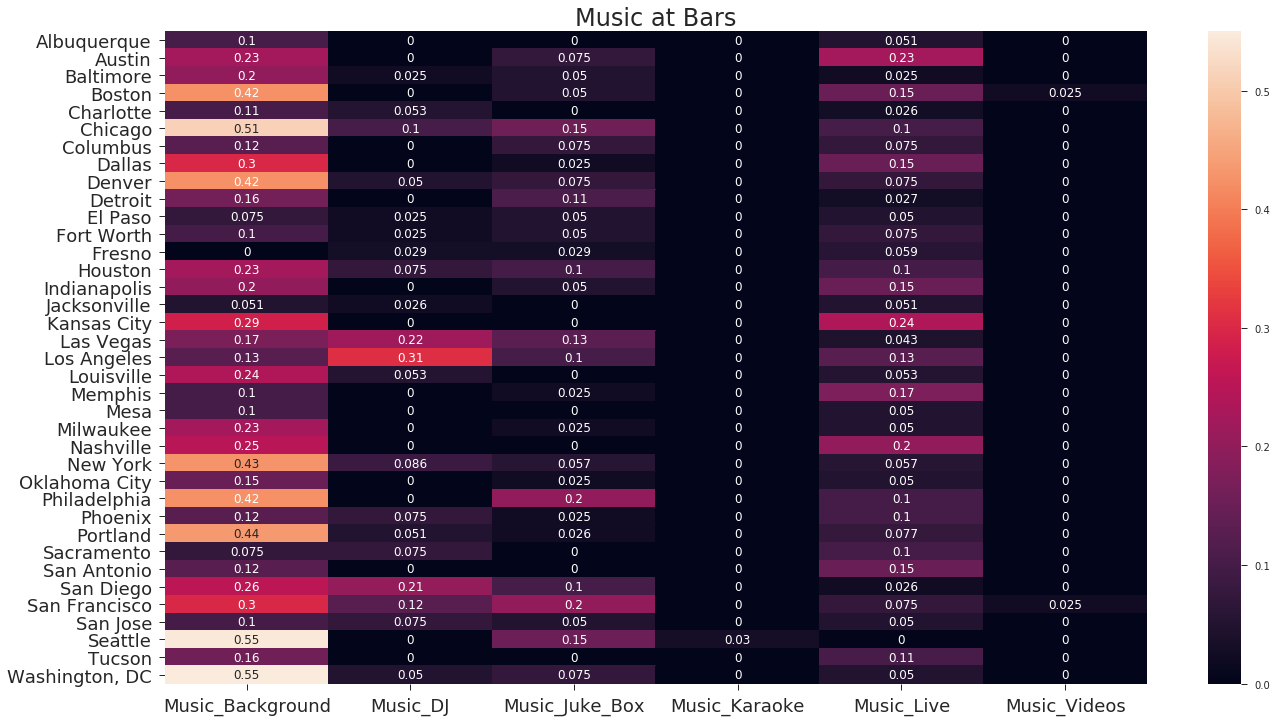

In [293]:
bar_data_music_grp = pd.melt(bar_data_music, id_vars=['City']).groupby(["City","variable"]).apply(lambda x: x[x['value'] != \
                        0].count()/x.count())['value'].reset_index()
bar_data_music_grp = bar_data_music_grp.pivot_table(values='value', index='City', columns='variable', aggfunc='sum')
fig, ax = plt.subplots(figsize=(22,12)) 
ax = sns.heatmap(bar_data_music_grp,annot=True)
ax.set_title('Music at Bars', fontsize=24);

plt.xlabel('', fontsize=18);
plt.ylabel('', fontsize=18);
ax.yaxis.set_tick_params(labelsize=18);
ax.xaxis.set_tick_params(labelsize=18);

In [294]:
bar_data_music_grp2 = pd.DataFrame(bar_data_music_grp.values,
                         columns=['Music_Background','Music_Live','Music_Juke_Box',
                            'Music_DJ','Music_Videos','Music_Karaoke'])
bar_data_music_grp2.index = bar_data_music_grp.index
bar_data_music_grp2.reset_index(inplace=True)

## Alcohol Types

The alcohol options at a bar are mostly the same in our dataset, however there is a small subset of bars that only offer beer and wine. And a very miniscule set of bars that do not offer alcohol at all!

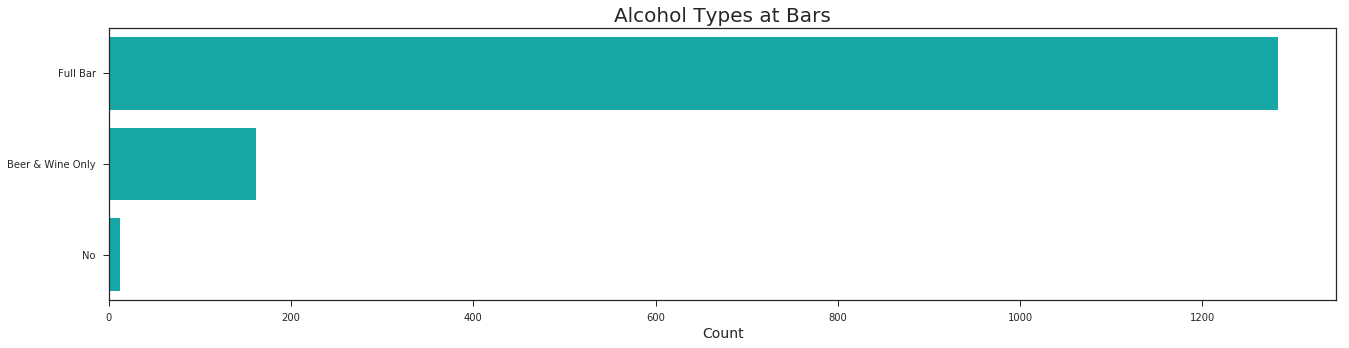

In [295]:
f, ax = plt.subplots(figsize=(22, 5))
sns.countplot(y="Alcohol", data=bar_data2, color="c");
ax.set_title("Alcohol Types at Bars",fontsize=20);
ax.set_xlabel("Count",fontsize=14)
ax.set_ylabel("");

Cities like Albuquerque, Austin and Houston have moderately high proportions of bars with 'Beer & Wine Only' in addition to cities around the California wine country.

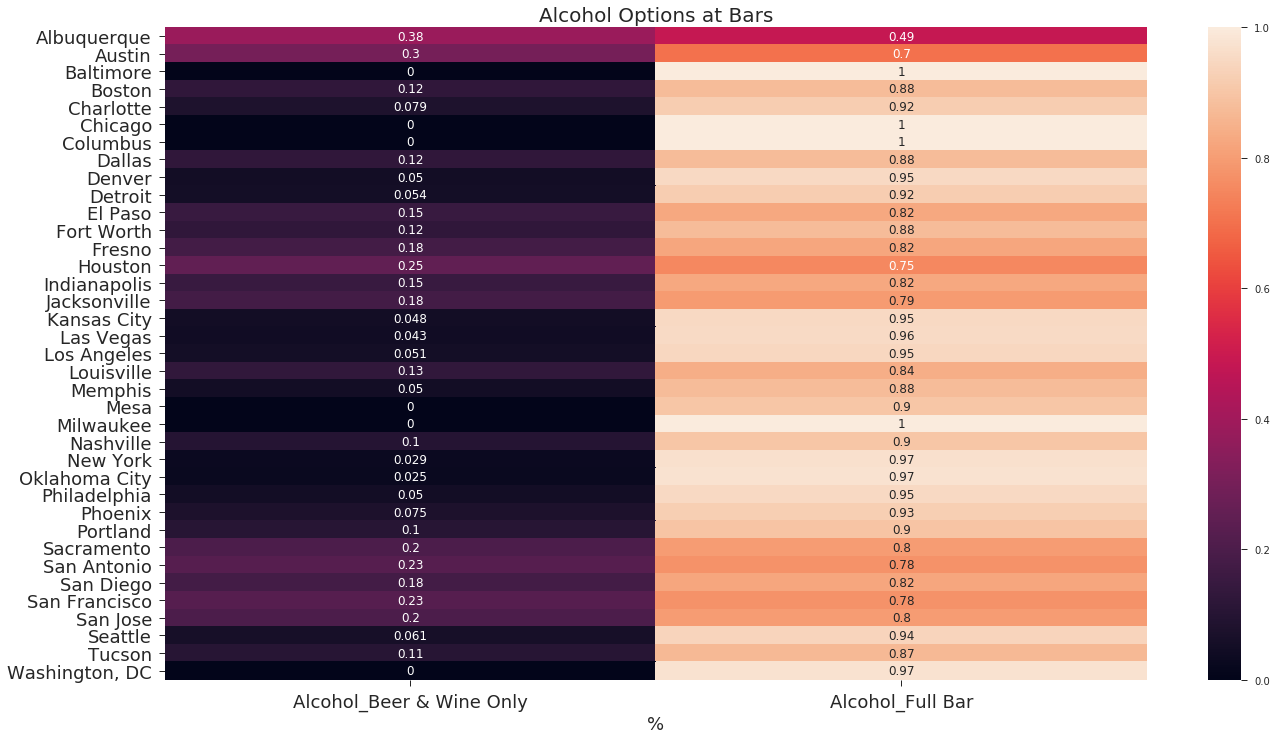

In [296]:
bar_data_alcohol = pd.get_dummies(bar_data2['Alcohol'],prefix='Alcohol')
bar_data_alcohol['City'] = bar_data2['City']
bar_data_alcohol_grp = pd.melt(bar_data_alcohol, id_vars=['City']).groupby(["City","variable"]).apply(lambda x: x[x['value'] != \
                        0].count()/x.count())['value'].reset_index()
bar_data_alcohol_grp = bar_data_alcohol_grp.pivot_table(values='value', index='City', columns='variable', aggfunc='sum')
columns = ["Alcohol_Beer & Wine Only","Alcohol_Full Bar"]
bar_data_alcohol_grp = bar_data_alcohol_grp[columns]
# plot heatmap
fig, ax = plt.subplots(figsize=(22,12)) 
ax = sns.heatmap(bar_data_alcohol_grp,annot=True)

ax.set_title("Alcohol Options at Bars",fontsize=20);
ax.set_xlabel("%",fontsize=18);
ax.set_ylabel("");
ax.yaxis.set_tick_params(labelsize=18);
ax.xaxis.set_tick_params(labelsize=18);

In [297]:
bar_data_alcohol_grp2 = pd.DataFrame(bar_data_alcohol_grp.values,
                         columns=["Alcohol_Beer & Wine Only","Alcohol_Full Bar"])
bar_data_alcohol_grp2.index = bar_data_alcohol_grp.index
bar_data_alcohol_grp2.reset_index(inplace=True)

## Noise Levels

Noise level at bars varies in our dataset. Most bars have an 'average' noise level, however a significant amount are considred to be loud.

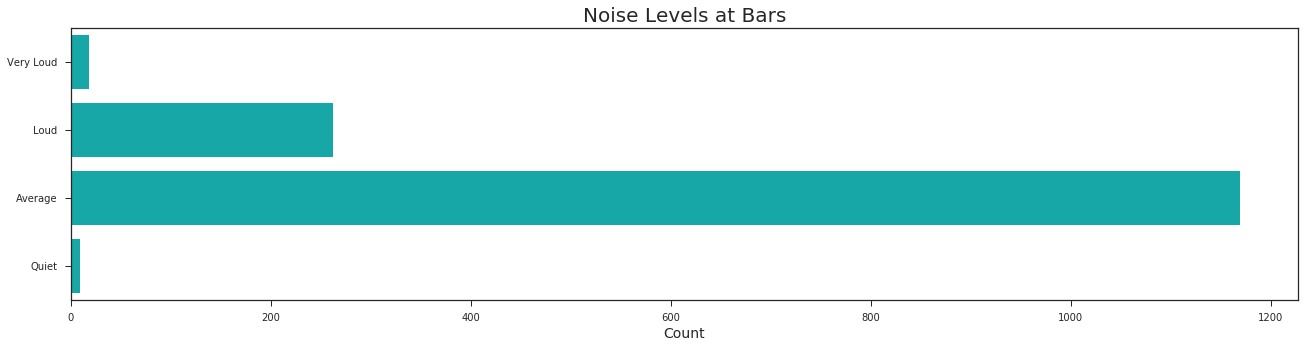

In [298]:
f, ax = plt.subplots(figsize=(22, 5))
sns.countplot(y="Noise Level", data=bar_data2, color="c",order=["Very Loud",
                                                               "Loud",
                                                               "Average",
                                                               "Quiet"]);

ax.set_title("Noise Levels at Bars",fontsize=20);
ax.set_xlabel("Count",fontsize=14)
ax.set_ylabel("");

Some cities with a high proportion of 'loud' bars include Boston, Los Angeles, Nashville, Washington D.C. as well as California cities.  Perhaps unsuprisingly, Las Vegas has the highest proportion of 'very loud' bars by far.

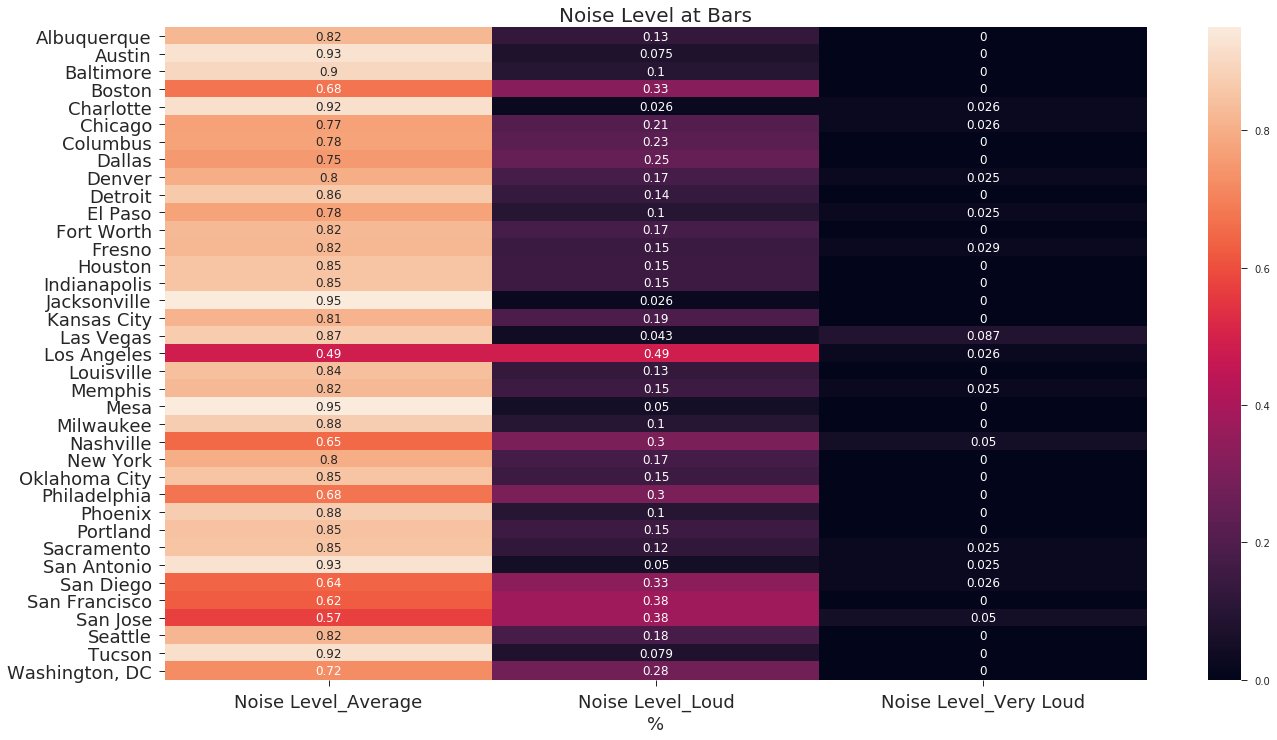

In [299]:
bar_data_noise = pd.get_dummies(bar_data2['Noise Level'],prefix='Noise Level')
bar_data_noise['City'] = bar_data2['City']
bar_data_noise_grp = pd.melt(bar_data_noise, id_vars=['City']).groupby(["City","variable"]).apply(lambda x: x[x['value'] != \
                        0].count()/x.count())['value'].reset_index()
bar_data_noise_grp = bar_data_noise_grp.pivot_table(values='value', index='City', columns='variable', aggfunc='sum')
columns = ["Noise Level_Average","Noise Level_Loud","Noise Level_Very Loud"]
bar_data_noise_grp = bar_data_noise_grp[columns]
# plot heatmap
fig, ax = plt.subplots(figsize=(22,12)) 
ax = sns.heatmap(bar_data_noise_grp,annot=True);

ax.set_title("Noise Level at Bars",fontsize=20);
ax.set_xlabel("%",fontsize=18);
ax.set_ylabel("");
ax.yaxis.set_tick_params(labelsize=18);
ax.xaxis.set_tick_params(labelsize=18);

In [300]:
bar_data_noise_grp2 = pd.DataFrame(bar_data_noise_grp.values,
                         columns=["Noise Level_Average","Noise Level_Loud","Noise Level_Very Loud"])
bar_data_noise_grp2.index = bar_data_noise_grp.index
bar_data_noise_grp2.reset_index(inplace=True)

## Wi-Fi Access

Wi-Fi access is often taken for granted in today's world, however a large proportion of bars in our dataset do not offer Wi-Fi.  Ironically, some of the cities with the highest proportion of no Wi-Fi bars include California cities located in and around Silicon Valley.

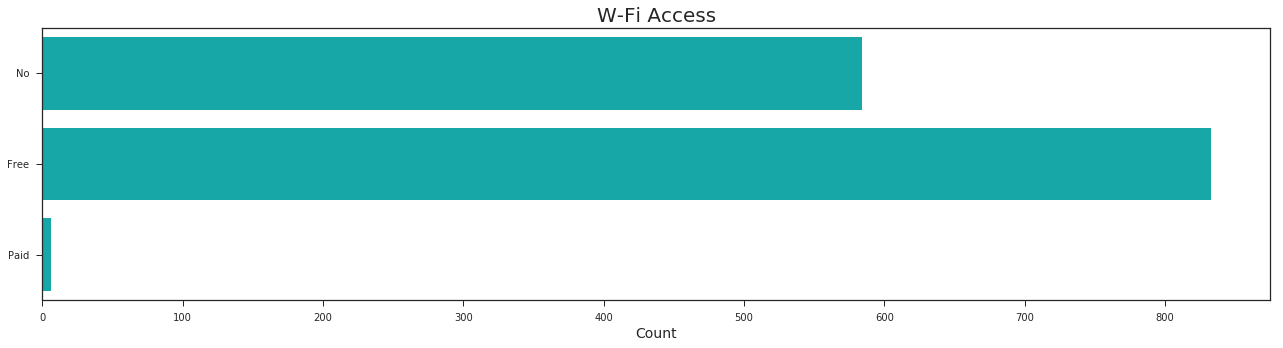

In [301]:
f, ax = plt.subplots(figsize=(22, 5))
sns.countplot(y="Wi-Fi", data=bar_data2, color="c");

ax.set_title("W-Fi Access",fontsize=20);
ax.set_xlabel("Count",fontsize=14)
ax.set_ylabel("");

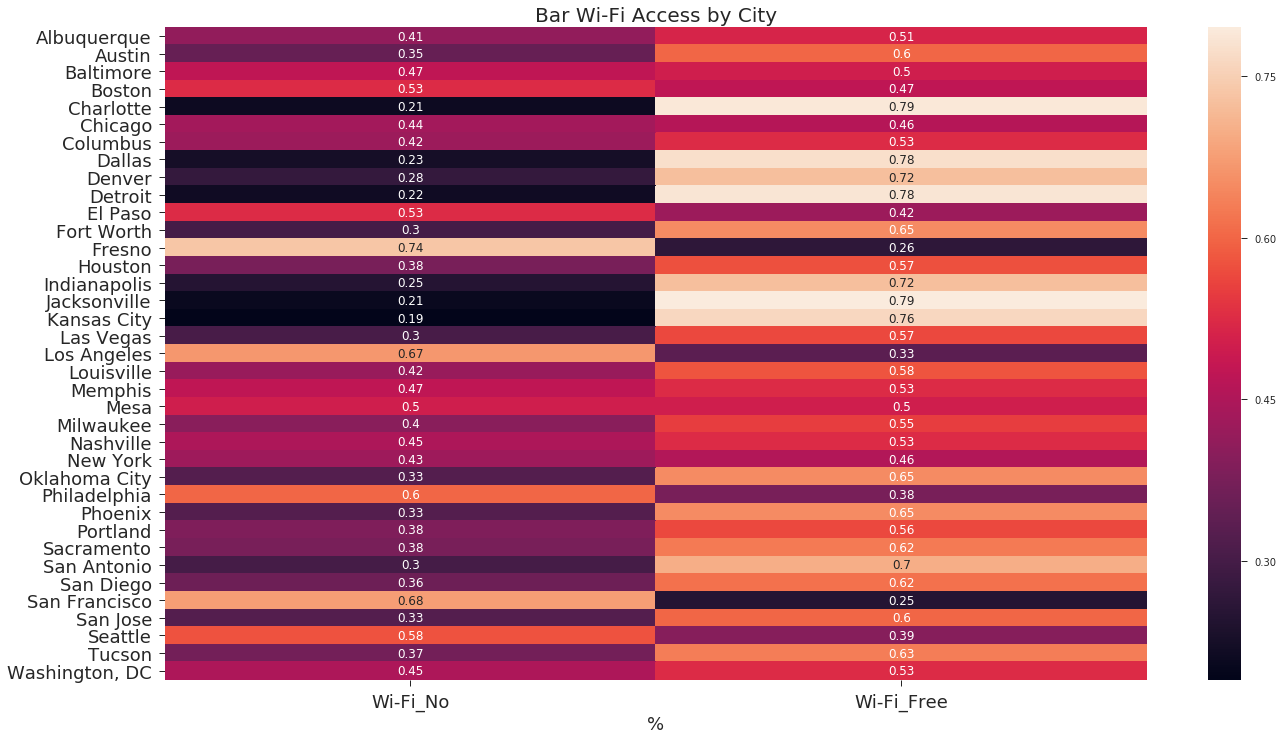

In [307]:
bar_data_wifi = pd.get_dummies(bar_data2['Wi-Fi'],prefix='Wi-Fi')
bar_data_wifi['City'] = bar_data2['City']
bar_data_wifi_grp = pd.melt(bar_data_wifi, id_vars=['City']).groupby(["City","variable"]).apply(lambda x: x[x['value'] != \
                        0].count()/x.count())['value'].reset_index()
bar_data_wifi_grp = bar_data_wifi_grp.pivot_table(values='value', index='City', columns='variable', aggfunc='sum')
columns = ["Wi-Fi_No","Wi-Fi_Free"]
bar_data_wifi_grp = bar_data_wifi_grp[columns]
# plot heatmap
fig, ax1 = plt.subplots(figsize=(22,12)) 
ax = sns.heatmap(bar_data_wifi_grp,annot=True)
ax1.set_title("Bar Wi-Fi Access by City",fontsize=20);
ax1.set_xlabel("%",fontsize=18);
ax1.set_ylabel("");
ax1.yaxis.set_tick_params(labelsize=18);
ax1.xaxis.set_tick_params(labelsize=18);

In [308]:
bar_data_wifi_grp2 = pd.DataFrame(bar_data_wifi_grp.values,
                         columns=["Wi-Fi_No","Wi-Fi_Free"])
bar_data_wifi_grp2.index = bar_data_wifi_grp.index
bar_data_wifi_grp2.reset_index(inplace=True)

## Smoking

By today, bars that condone smoking indoors are few and far between.  A very large proportion do not have places for smoking at all, while a smaller proportion allow it outdoors.  Larger cities like Chicago, New York, Seattle and San Francisco lead the sample in not allowing smoking.  Likewise, Las Vegas AKA "Sin City" with its many casinos and smoke-friendly venues, has a dramatically higher proprtion of smoking establishments.

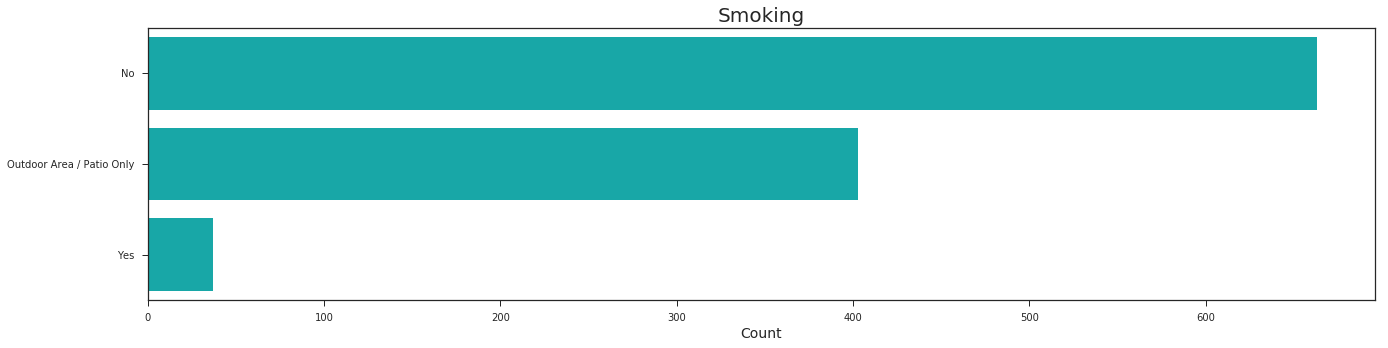

In [309]:
f, ax = plt.subplots(figsize=(22, 5))
sns.countplot(y="Smoking", data=bar_data2, color="c");
ax.set_title("Smoking",fontsize=20);
ax.set_xlabel("Count",fontsize=14)
ax.set_ylabel("");

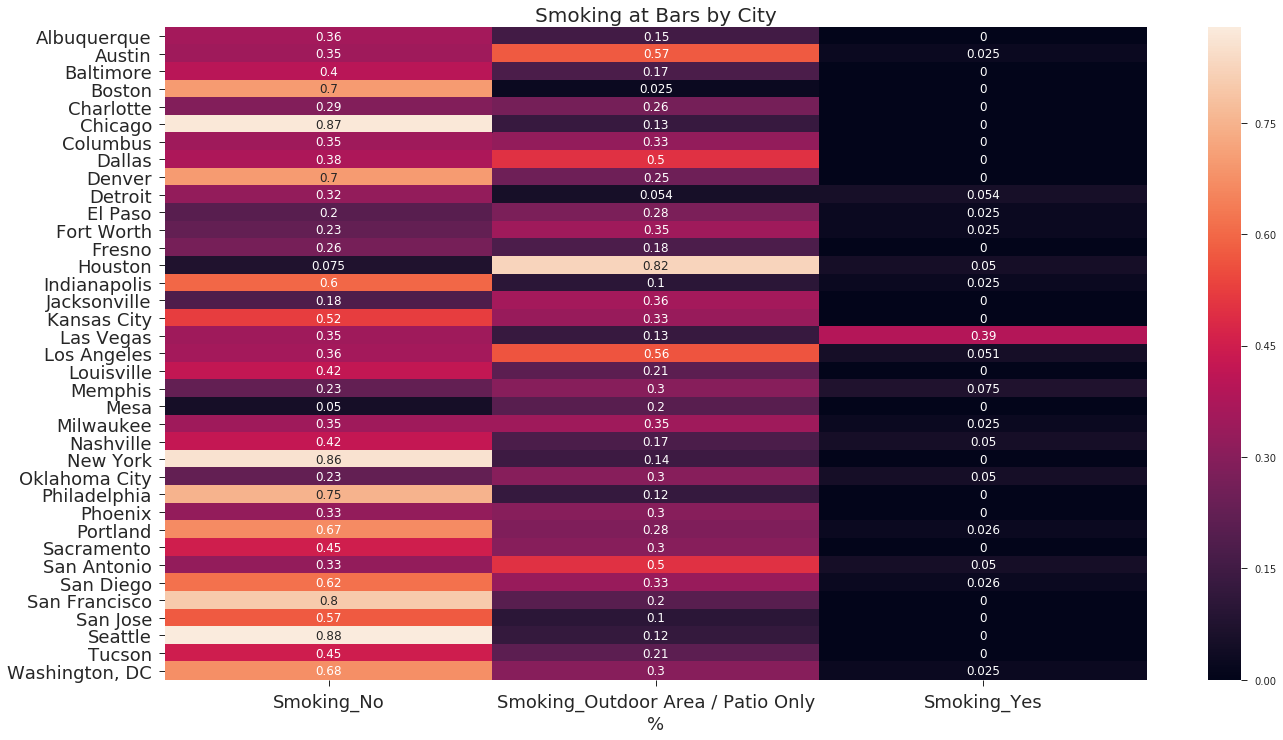

In [310]:
bar_data_smoking = pd.get_dummies(bar_data2['Smoking'],prefix='Smoking')
bar_data_smoking['City'] = bar_data2['City']
bar_data_smoking_grp = pd.melt(bar_data_smoking, id_vars=['City']).groupby(["City","variable"]).apply(lambda x: x[x['value'] != \
                        0].count()/x.count())['value'].reset_index()
bar_data_smoking_grp = bar_data_smoking_grp.pivot_table(values='value', index='City', columns='variable', aggfunc='sum')
# plot heatmap
fig, ax1 = plt.subplots(figsize=(22,12)) 
ax1 = sns.heatmap(bar_data_smoking_grp,annot=True)
ax1.set_title("Smoking at Bars by City",fontsize=20);
ax1.set_xlabel("%",fontsize=18);
ax1.set_ylabel("");
ax1.yaxis.set_tick_params(labelsize=18);
ax1.xaxis.set_tick_params(labelsize=18);

In [311]:
bar_data_smoking_grp2 = pd.DataFrame(bar_data_smoking_grp.values,
                         columns=["Smoking_No","Smoking_Outdoor Area / Patio Only",
                                  "Smoking_Yes"])
bar_data_smoking_grp2.index = bar_data_smoking_grp.index
bar_data_smoking_grp2.reset_index(inplace=True)

## Pricing

An important aspect of any given bar is its prices.  Overall, 'moderate' pricing is the most common in our dataset, followed by a near even split between 'expensive' and 'low' pricing and a slim number of bars with 'luxurious' pricing levels.

In [312]:
def switcher(val):
    if val == "$": return "Low"
    elif val == "$$": return "Moderate"
    elif val == "$$$": return "Expensive"
    elif val == "$$$$": return "Luxurious"

In [313]:
bar_data2['Pricing'] = bar_data2['Price_Level'].apply(switcher)

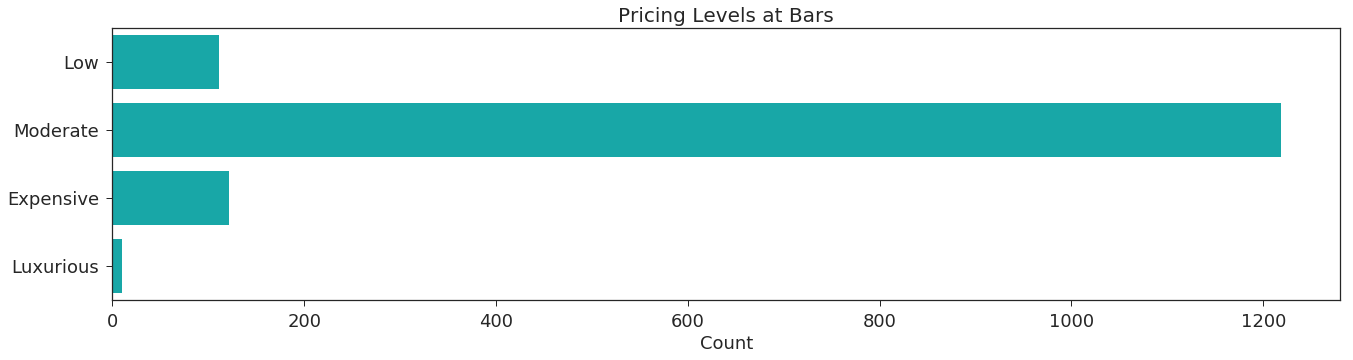

In [314]:
f, ax = plt.subplots(figsize=(22, 5))
sns.countplot(y="Pricing", data=bar_data2, color="c",order=["Low","Moderate","Expensive","Luxurious"]);

ax.set_title("Pricing Levels at Bars",fontsize=20);
ax.set_xlabel("Count",fontsize=18)
ax.set_ylabel("");

ax.yaxis.set_tick_params(labelsize=18);
ax.xaxis.set_tick_params(labelsize=18);

The cost of living in a given city is somewhat reflected in this measure of bar pricing.  East coast cities, in addition to Las Vegas, lead the dataset in having higher proportions of 'expensive' bars.  Likewise, western cities like Albuquerque, Austin and El Paso have the most 'low' priced bars.

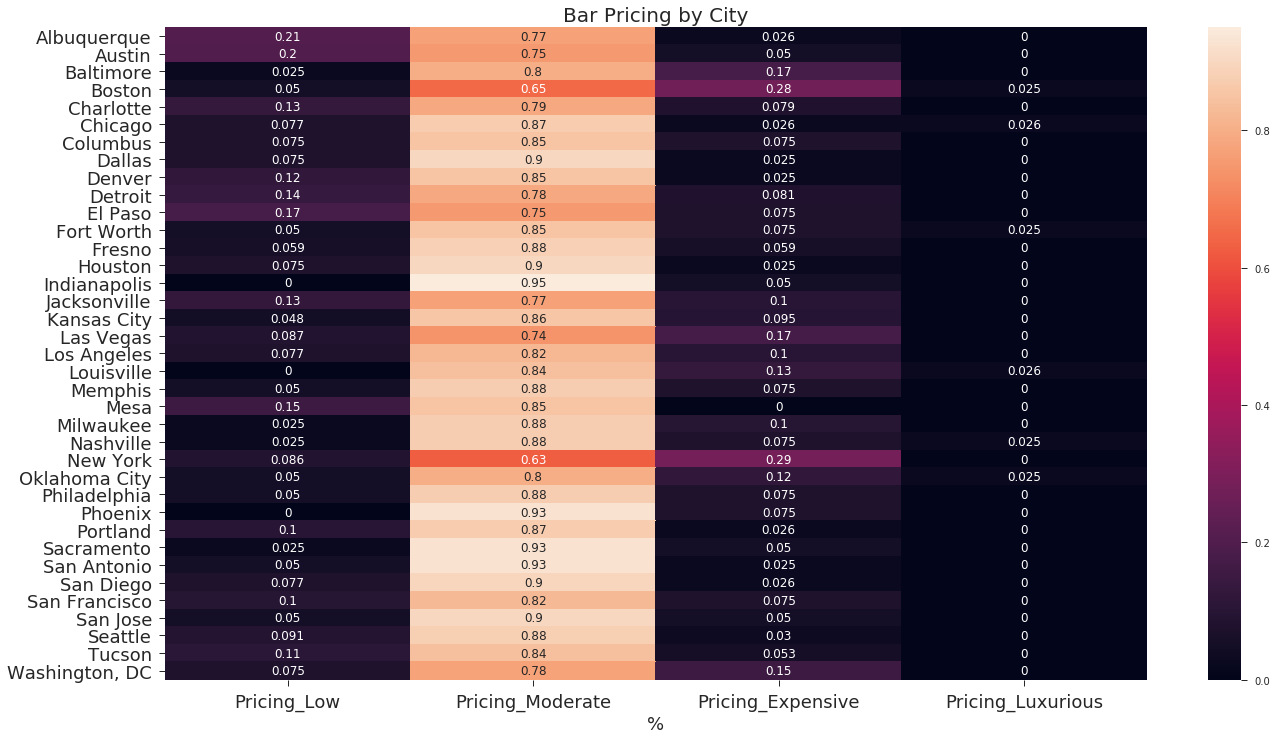

In [315]:
bar_data_pricing = pd.get_dummies(bar_data2['Pricing'],prefix='Pricing')
bar_data_pricing['City'] = bar_data2['City']
bar_data_pricing_grp = pd.melt(bar_data_pricing, id_vars=['City']).groupby(["City","variable"]).apply(lambda x: x[x['value'] != \
                        0].count()/x.count())['value'].reset_index()
bar_data_pricing_grp = bar_data_pricing_grp.pivot_table(values='value', 
                        index='City', columns='variable', aggfunc='sum')
columns = ["Pricing_Low","Pricing_Moderate","Pricing_Expensive","Pricing_Luxurious"]
bar_data_pricing_grp = bar_data_pricing_grp[columns]
# plot heatmap
fig, ax1 = plt.subplots(figsize=(22,12)) 
ax1 = sns.heatmap(bar_data_pricing_grp,annot=True)
ax1.set_title("Bar Pricing by City",fontsize=20);
ax1.set_xlabel("%",fontsize=18);
ax1.set_ylabel("");
ax1.yaxis.set_tick_params(labelsize=18);
ax1.xaxis.set_tick_params(labelsize=18);

In [316]:
bar_data_pricing_grp2 = pd.DataFrame(bar_data_pricing_grp.values,
                         columns=["Pricing_Expensive","Pricing_Low",
                                  "Pricing_Luxurious","Pricing_Moderate"])
bar_data_pricing_grp2.index = bar_data_pricing_grp.index
bar_data_pricing_grp2.reset_index(inplace=True)

# Correlation Matrices

Now that we have taken a look at the features of our dataset and their relative frequencies across cities, lets try to dig deeper and explore whether or not some features are related to each other.  

The following table values represent p-values from a series of binary Chi-Squared tests between each feature in the data.  **Chi-Squared Tests** are used to compute independence of categorical variables in a given dataset.  Low p-values, under 0.05, indicate that the features are not independent from one another.  These values have been highlighted in green.  You can hover over the column and row indexes to see the variable names and hover over the corresponding table cells to see the p-value.

In [317]:
from scipy.stats import chi2_contingency
#Combine raw data-frames
dfs_all_cat = [bar_bikes,bar_dancing,bar_data_alcohol,bar_data_ambience,bar_data_music,
           bar_data_nights,bar_data_noise,bar_data_parking,bar_data_pricing,
           bar_data_smoking,bar_data_wifi,bar_groups_grp,bar_hh,bar_pooltable,bar_reservations]
dfs_all_cat_master = pd.concat(dfs_all_cat,axis=1)
del dfs_all_cat_master['City']
dfs_all_cat_master.index = bar_bikes['City']
# create empty correlation matrix
dfs_all_cat_corr = pd.DataFrame().reindex_like(dfs_all_cat_master)
dfs_all_cat_corr = dfs_all_cat_corr[0:50]
dfs_all_cat_corr.index = dfs_all_cat_corr.columns

In [318]:
# loop through each column/row to calculate correlation with chi2
for col in dfs_all_cat_corr.columns:
    for idx,row in dfs_all_cat_corr.iterrows():
        if idx == col:
            dfs_all_cat_corr.loc[idx,col] = 1.00
        else:
            chi2_test_reslt = chi2_contingency(pd.crosstab(dfs_all_cat_master[col], dfs_all_cat_master[idx]))
            chi2_test_p_value = chi2_test_reslt[1]
            dfs_all_cat_corr.loc[idx,col] = chi2_test_p_value

In [321]:
def magnify():
    return [dict(selector="th",
                 props=[("font-size", "4pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]

def highlight_vals_pos(val, min = 0, max=.05, color_pos='#5fba7d'):
    if val > min and val < max: return 'background-color: %s' % color_pos
    else: return ''
    
dfs_all_cat_corr.style.applymap(highlight_vals_pos)\
    .set_properties(**{'max-width': '80px', 'font-size': '1pt'})\
    .set_caption("Hover to magify")\
    .set_precision(2)\
    .set_table_styles(magnify())

Exploring which features in our dataset are not independent of each other yields a table with many p-values less than 0.05.  This implies that many features are related, however this is not suprising due to the limited number of features to begin with. 

We will explore the following relationships between key features such as Ambience, Pricing, Noise and Music.

## Ambience VS Pricing

Pricing versus ambience shows us a few interesting trends.
* Expensive bars transcend all ambience types.
* Low-priced bars correspond less with higher end bar types, with the suprising exception of 'casual'.
* Luxuriously-priced bars (although a small subset of our sample, correspond with upscale and romantic bars.
* Moderately-priced do not correspond with 'hipster' bars. A segment defined by either 'low' or 'expensive' pricing.

In [322]:
sub = dfs_all_cat_corr[dfs_all_cat_corr.filter(like='Amb').columns]
sub = sub[sub.index.str.contains("Pricing")]

sub.style.applymap(highlight_vals_pos)

,Amb_Casual,Amb_Classy,Amb_Romantic,Amb_Trendy,Amb_Divey,Amb_Hipster,Amb_Upscale,Amb_Intimate
Pricing_Expensive,1.78764e-31,6.93445e-28,4.43384e-17,0.0138541,0.0190394,0.000530362,1.4874e-48,2.08981e-08
Pricing_Low,0.426299,0.00346844,0.163475,1.39195e-09,1.986e-67,0.0274858,0.0954572,0.0626712
Pricing_Luxurious,0.00297243,0.36209,0.00887596,0.50054,0.966528,0.4045,1.44359e-21,0.815454
Pricing_Moderate,1.9154e-18,4.00183e-10,5.58269e-09,0.00853627,8.61943e-25,0.234018,3.72084e-32,0.00384441


## Ambience VS Music

Ambience versus music shows important similarities and differences between bar types.  The following inferences can be made from the data:
* Bars with Background Music do not correspond with higher end bars or 'Hipster' bars.
* Bars with Live Music only have a significant correspondence with 'Trendy' bars.
* Bars with Juke Boxes are popular, with significant correspondence with multiple ambience types.
* Bars with DJs only have signficant correspondence with 'Casual' and 'Trendy' bars.
* Bars with Music Videos only have a significant correspondence with 'Romantic' bars.

In [323]:
sub = dfs_all_cat_corr[dfs_all_cat_corr.filter(like='Amb').columns]
sub = sub[sub.index.str.contains("Music")]

sub.style.applymap(highlight_vals_pos)

,Amb_Casual,Amb_Classy,Amb_Romantic,Amb_Trendy,Amb_Divey,Amb_Hipster,Amb_Upscale,Amb_Intimate
Music_Background,5.12397e-08,0.491548,0.907224,0.000322056,0.00186639,0.078588,0.98362,2.44449e-09
Music_Live,0.707622,0.418444,0.186207,2.8064e-06,0.0831029,0.845234,0.869995,0.783729
Music_Juke_Box,0.919724,0.0482106,0.281792,1.48228e-06,2.26901e-34,0.0479436,0.18708,0.379652
Music_DJ,6.19776e-05,0.440084,0.352718,0.00434367,0.191958,0.0942321,0.788219,0.186652
Music_Videos,0.510749,0.344541,0.0363627,0.975617,0.175917,0.659877,0.0724664,0.10559
Music_Karaoke,0.971599,0.105183,0.00183705,0.54416,0.0326773,0.30375,0.00657623,0.0130683


## Ambience VS Noise Level

When it comes to ambience and noise level, several we can draw the following conclusions:
* Average noise level corresponds with all bar types except 'Casual','Trendy' and 'Upscale'.
* Loud noise level corresponds with all bar types except 'Casual' and 'Trendy'.
* Quiet noise level does not correspond with 'Trendy','Divey','Hipster' or even 'Romantic'bar types.
* Very loud noise level does not correspond with any bar types.

In [324]:
sub = dfs_all_cat_corr[dfs_all_cat_corr.filter(like='Amb').columns]
sub = sub[sub.index.str.contains("Noise")]

sub.style.applymap(highlight_vals_pos)

,Amb_Casual,Amb_Classy,Amb_Romantic,Amb_Trendy,Amb_Divey,Amb_Hipster,Amb_Upscale,Amb_Intimate
Noise Level_Average,0.674638,0.0100826,0.0184314,0.124814,6.17747e-06,0.0147264,0.183225,0.00452822
Noise Level_Loud,0.698267,0.000715417,0.010024,0.293907,5.4843e-06,0.00258597,0.00282225,0.00102822
Noise Level_Quiet,0.0344678,1.09331e-06,0.533681,0.192372,0.905565,0.45772,4.3962e-10,0.0357611
Noise Level_Very Loud,0.387651,0.447112,0.914643,0.92654,0.695865,0.973645,0.940853,0.846538


## Pricing VS Music

* Live Music does not correspond at all with any pricing level
* Juke Boxes correspond with all pricing levels except 'Luxurious'
* DJs correspond with expensive and moderate pricing levels
* Music Videos and Karaoke only correspond with 'Luxurious' pricing levels.  Although this is a small subset of our data.

In [325]:
sub = dfs_all_cat_corr[dfs_all_cat_corr.filter(like='Pricing').columns]
sub = sub[sub.index.str.contains("Music")]

sub.style.applymap(highlight_vals_pos)

,Pricing_Expensive,Pricing_Low,Pricing_Luxurious,Pricing_Moderate
Music_Background,0.0152035,0.000703196,0.387556,0.802291
Music_Live,0.114417,0.952721,0.533656,0.320819
Music_Juke_Box,0.00966915,6.96439e-14,0.940254,0.00205393
Music_DJ,0.0344498,0.557016,0.966528,0.0456951
Music_Videos,0.394062,0.35234,2.97834e-05,0.750087
Music_Karaoke,0.131882,0.109247,2.15724e-09,0.369751


## Pricing VS Noise

* Bars with 'Average' and 'Loud' music correspond only with 'Low' and 'Expensive' pricing
* Quiet bars do not correspond with 'Low' or 'Luxurious' pricing

In [326]:
sub = dfs_all_cat_corr[dfs_all_cat_corr.filter(like='Pricing').columns]
sub = sub[sub.index.str.contains("Noise")]

sub.style.applymap(highlight_vals_pos)

,Pricing_Expensive,Pricing_Low,Pricing_Luxurious,Pricing_Moderate
Noise Level_Average,0.0344866,0.00250591,0.689457,0.752043
Noise Level_Loud,0.000397718,0.0266822,0.809056,0.267984
Noise Level_Quiet,0.000888719,0.817003,0.0752946,0.00697119
Noise Level_Very Loud,0.0866431,0.904938,0.278151,0.110057


## Music VS Noise

* Average and Loud noise does not correspond with background music, music videos or karaoke.
* Quiet noise only corresponds with Music Videos and Karaoke.
* Very loud noise level corresponds with background music, DJs, music videos and karaoke.

In [327]:
sub = dfs_all_cat_corr[dfs_all_cat_corr.filter(like='Music').columns]
sub = sub[sub.index.str.contains("Noise")]

sub.style.applymap(highlight_vals_pos)

,Music_Background,Music_Live,Music_Juke_Box,Music_DJ,Music_Videos,Music_Karaoke
Noise Level_Average,0.848293,4.9489e-08,0.00336714,3.03022e-13,0.860835,0.454065
Noise Level_Loud,0.743654,5.64525e-08,0.0029188,5.4843e-06,0.793921,0.40275
Noise Level_Quiet,0.759183,0.697888,0.998405,0.905565,1.02506e-05,2.68683e-10
Noise Level_Very Loud,0.0371897,0.136066,0.60223,3.7068e-27,0.00228588,9.68757e-06


# Factor Analysis

**Factor Analysis** is a statistical method used to compress the variability of correlated variables into a lower number of "factors".  This tool helps us transform our dataset with 32 variables or dimensions into 2 for interpretability and insight.

We will use the popular Python library **scikit-learn** to perform our factor analysis on our dataset of feature proportions grouped by city.  You can read more about scikit-learn's implementation of Factor Analysis [here](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.FactorAnalysis.html).

The dataset used for further modeling steps reflects some changes that were made with the aesthetics of visualization and analytical interpretation in mind.  Some somewhat redundant or un-interesting features were removed such as certain nights of the week, and 'average' level features which artificially inflate variable importance and variance of our factor analysis, but do not reveal any non-obvious insights.

In [334]:
#Combine raw 'grouped' data-frames
dfs_all = [bar_bikes_grp,bar_dancing_grp,bar_data_alcohol_grp2,bar_data_ambience_grp2,bar_data_music_grp2,
           bar_data_nights_grp2,bar_data_noise_grp2,bar_data_parking_grp2,bar_data_pricing_grp2,
           bar_data_smoking_grp2,bar_data_wifi_grp2,bar_groups_grp,bar_hh_grp,bar_pooltable_grp,bar_reservations_grp]
dfs_all_master = pd.concat(dfs_all,axis=1)
del dfs_all_master['City']
dfs_all_master.index = bar_bikes_grp['City']
del dfs_all_master['Mon_Night']
del dfs_all_master['Tue_Night']
del dfs_all_master['Wed_Night']
del dfs_all_master['Sat_Night']
del dfs_all_master['Fri_Night']
del dfs_all_master['Smoking_No']
del dfs_all_master['Smoking_Outdoor Area / Patio Only']
del dfs_all_master['Parking_Street']
del dfs_all_master['Pricing_Moderate']
del dfs_all_master['Noise Level_Average']
del dfs_all_master['Music_Background']
del dfs_all_master['Wi-Fi_No']
del dfs_all_master['Wi-Fi_Free']
del dfs_all_master['Alcohol_Full Bar']

In [335]:
# scale the dataset
scale_function = lambda x: (x - x.mean()) / x.std()
dfs_all_master_scaled = dfs_all_master.apply(scale_function)

In [336]:
# perform factor analysis with 2 components
from sklearn.decomposition import FactorAnalysis
factor = FactorAnalysis(n_components=2,random_state=99).fit(dfs_all_master_scaled)

In [337]:
# extract factor loadings
loadings = pd.DataFrame(factor.components_).T
loadings.columns = ['Factor 1','Factor 2']
loadings.index = dfs_all_master_scaled.columns
# compute commonalities of variables on factors
loadings['Communality'] = (loadings['Factor 1']**2)+(loadings['Factor 2']**2)

The result of our factor analysis can be seen in the below table which contains so called factor **loadings** in the first two columns and **communality** in the third column.

Communality is calculated by summing up the squares of the loadings.  These values are similar to r-squared values in regression models and can be interpreted as the proportion of variance in the given variable as explained by the two factors.

We shown in the below table, only two of our variables have final communality above a .70 level which we would equivocate as having good explanatory power.

However, as we are dealing with real world data and due to the fact that we would like a somewhat interesting visualization for our analysis, we will assign a cutoff of .38 communality to include in our perceptual map below.

In [338]:
loadings.sort_values('Communality',ascending=False).head(10)

,Factor 1,Factor 2,Communality
Thu_Night,0.907631,0.041078,0.825481
Noise Level_Very Loud,-0.148567,0.825325,0.703233
Good For Dancing,-0.032477,0.833766,0.696221
Parking_Private Lot,0.759832,-0.225867,0.628361
Music_Live,0.407588,0.614281,0.543469
Smoking_Yes,-0.103628,0.705092,0.507894
Music_Juke_Box,0.644076,0.182402,0.448104
Good for Groups,-0.583952,0.304315,0.433608
Noise Level_Loud,0.607011,0.194360,0.406238
Amb_Casual,-0.605365,-0.131279,0.383701


## Perceptual Map

The below figure is a **Perceptual Map**.  This type of plot superimposes the coordinates of observations (cities) and features (bar attributes) into a 2D space as decomposed by our two factors. Attributes and cities that lay close to each other are said to be highly correlated with each other. Lines originating from the middle of the chart help visualize how correlated or un-correlated cities and attributes are with each other and themselves.

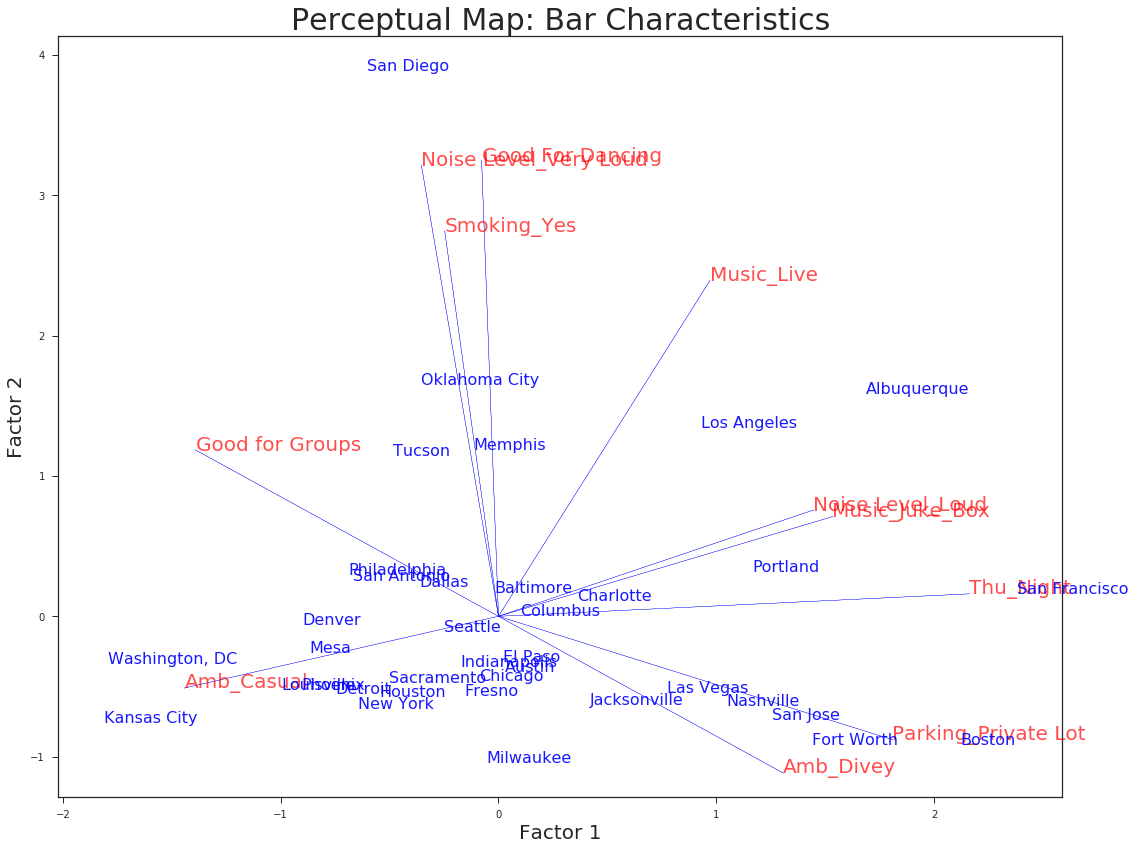

In [344]:
fig, ax2 = plt.subplots()
fig.set_size_inches(18, 14)

xvector = factor.components_[0]
yvector = factor.components_[1]

xs = factor.transform(dfs_all_master_scaled)[:,0]
ys = factor.transform(dfs_all_master_scaled)[:,1]

## visualize projections
counter = 0
for idx, row in loadings.iterrows():
    if row['Communality'] > 0.38:
        plt.arrow(0, 0, row['Factor 1']*max(xs), row['Factor 2']*max(ys),
                  color='b', width=0.0005, head_width=0.0025,alpha=.8)
        plt.text(row['Factor 1']*max(xs), row['Factor 2']*max(ys),
                 list(dfs_all_master_scaled.columns.values)[counter], 
                 color='r',alpha=.7,size=20)
    counter += 1
    
for i in range(len(xs)):
    plt.plot(xs[i], ys[i])
    plt.text(xs[i], ys[i], list(dfs_all_master_scaled.index)[i], 
             color='b',size=16,alpha=.9)

ax2.set_title("Perceptual Map: Bar Characteristics",size=30)
plt.xlabel('Factor 1',size=20)
plt.ylabel('Factor 2',size=20)
    
plt.show()

# Conclusion

At this point, we have explored the criteria Yelp offers users to rate and review bars.  We've compared and contrasted the attributes across different cities and showed where some cities are more similiar and unique.  We finished by creating a 'Perceptual Map' to graphically show the similarities between cities and characteristics. 

I hope you have enjoyed reading this exploratory data analysis.  Please feel free to send feedback, comments or questions to collierking@outlook.com.

Thank you!
Collier King

# Computing Environment

## Platform/OS

In [304]:
import platform
print("Platform:"+platform.system()+str(platform.architecture()))
print("..."+str(platform.release()+str(platform.version())))

Platform:Linux('64bit', '')
...4.10.0-35-generic#39-Ubuntu SMP Wed Sep 13 07:46:59 UTC 2017


## Python Version

In [305]:
import sys
print("Python Version: "+str(sys.version))

Python Version: 3.5.3 (default, Jul 21 2017, 01:02:33) 
[GCC 6.3.0 20170406]


## Packages/Libraries

In [306]:
import pandas as pd
print(pd.__name__," ",pd.__version__)
import numpy as np
print(np.__name__," ",np.__version__)
import sklearn
print(sklearn.__name__," ",sklearn.__version__)
import matplotlib
print(matplotlib.__name__," ",matplotlib.__version__)
import seaborn as sns
print(sns.__name__," ",sns.__version__)
import scipy
print(scipy.__name__," ",scipy.__version__)

pandas   0.20.3
numpy   1.13.1
sklearn   0.19.0
matplotlib   2.0.2
seaborn   0.8.0
scipy   0.19.1
